In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy.stats import wilcoxon

sns.set_style("whitegrid")

## Check the plasmid control:
#### purified plasmid was added after locus purification. should have ~uniform methylation

In [2]:
wt_rep3_naked_plasmid = np.loadtxt("controls/wt_mat_Megalodon_repIII_naked_plasmid.txt")
wt_rep2_naked_plasmid = np.loadtxt("controls/naked_plasmid_wt_rep2_1000reads.txt") #1000 reads
#np.random.seed(0)
#wt_rep2_naked_plasmid = subsample(wt_rep2_naked_plasmid, 780)
wt_rep2_naked_plasmid = wt_rep2_naked_plasmid[:780,:]

dies6_rep1_naked = np.loadtxt("controls/DIES6_ALL_REP1_naked_plasmid.txt")
dies6_rep2_naked = np.loadtxt("controls/DIES6_rep2_780READS_naked_plasmid.txt")

disw2_rep1_naked = np.loadtxt("controls/naked_plasmid_disw2_rep1_clean_780READS.csv")
disw2_rep2_naked = np.loadtxt("controls/naked_plasmid_disw2_rep2_clean_780_reads.csv")

#Load methylation data for the reverse strand:

wt_rep3_plasmid_rev = np.loadtxt("controls/plasmid_reverse/mat_Megalodon_repIII_naked_plasmid_minus.txt")
wt_rep2_plasmid_rev = np.loadtxt("controls/plasmid_reverse/mat_Megalodon_repII_naked_plasmid_minus.txt")

dies6_rep1_plasmid_rev = np.loadtxt("controls/plasmid_reverse/mat_Megalodon_20220126_METHYLATION_DIES6_ALL_REP1_naked_plasmid_minus.txt")
dies6_rep2_plasmid_rev = np.loadtxt("controls/plasmid_reverse/mat_Megalodon_20220207_DIES6_ALLstrains_meth_REP2_naked_plasmid_minus.txt")

disw2_rep1_plasmid_rev = np.loadtxt("controls/plasmid_reverse/mat_Megalodon_20211201_all_strains_REP1_disw2_naked_plasmid_minus.txt")
disw2_rep2_plasmid_rev = np.loadtxt("controls/plasmid_reverse/mat_Megalodon_20220221_disw2_all_meth_REP2_naked_plasmid_minus.txt")


In [3]:
def entropy(labels, base=None):
    base = 2 if base is None else base
    _ ,counts = np.unique(labels, return_counts=True)
    norm_counts = counts / counts.sum()

    return -(norm_counts * np.log(norm_counts)/np.log(base)).sum()

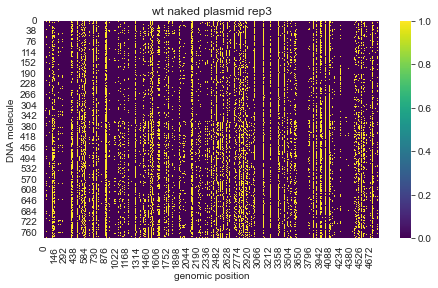

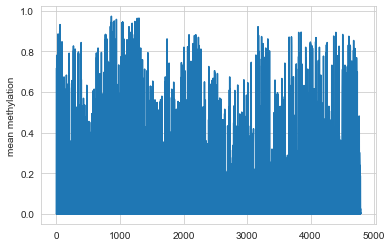

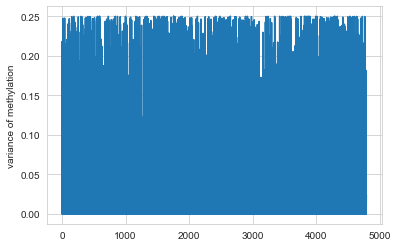

<AxesSubplot:title={'center':'naked plasmid wt rep3, entropy per position'}, ylabel='entropy'>

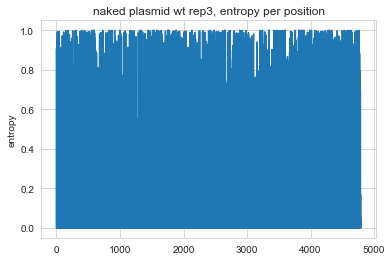

In [4]:
plt.figure(figsize=(7.5,4))
sns.heatmap(wt_rep3_naked_plasmid, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.title("wt naked plasmid rep3")
plt.show()

sns.lineplot(x = range(wt_rep3_naked_plasmid.shape[1]), 
             y = wt_rep3_naked_plasmid.mean(axis = 0))
plt.ylabel("mean methylation")
plt.show()

sns.lineplot(x = range(wt_rep3_naked_plasmid.shape[1]), 
             y = wt_rep3_naked_plasmid.std(axis = 0)**2)
plt.ylabel("variance of methylation")
plt.show()

g = sns.lineplot(x = range(wt_rep3_naked_plasmid.shape[1]), 
                 y = np.apply_along_axis(entropy, 0, wt_rep3_naked_plasmid))
g.set_ylabel("entropy")
g.set_title("naked plasmid wt rep3, entropy per position")
#g.set_xticks(range(0, ARS305_wt.shape[1], 50))
g

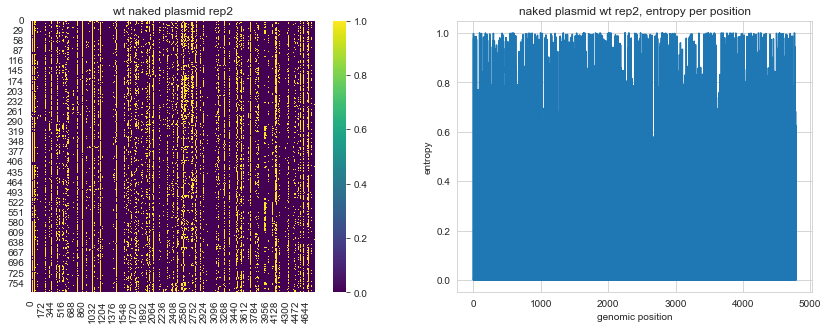

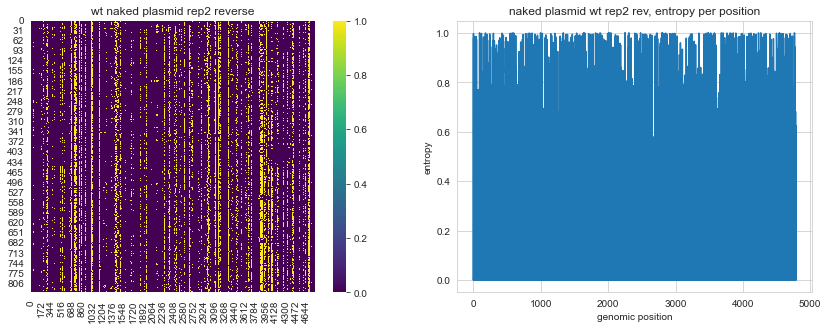

In [5]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (14,5))

sns.heatmap(wt_rep2_naked_plasmid, cmap = "viridis", ax =ax1)
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
ax1.set_title("wt naked plasmid rep2")

sns.set_style("whitegrid")
sns.lineplot(x = range(wt_rep2_naked_plasmid.shape[1]), 
                 y = np.apply_along_axis(entropy, 0, wt_rep2_naked_plasmid), ax = ax2)
plt.ylabel("entropy")
ax2.set_title("naked plasmid wt rep2, entropy per position")
plt.show()


fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (14,5))

sns.heatmap(wt_rep2_plasmid_rev, cmap = "viridis", ax =ax1)
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
ax1.set_title("wt naked plasmid rep2 reverse")

sns.set_style("whitegrid")
sns.lineplot(x = range(wt_rep2_naked_plasmid.shape[1]), 
                 y = np.apply_along_axis(entropy, 0, wt_rep2_naked_plasmid), ax = ax2)
plt.ylabel("entropy")
ax2.set_title("naked plasmid wt rep2 rev, entropy per position")
plt.show()

In [6]:
wt_rep3_plasmid_join = np.concatenate((wt_rep3_naked_plasmid, wt_rep3_plasmid_rev[:, :-1]), axis = 0)
wt_rep2_plasmid_join = np.concatenate((wt_rep2_naked_plasmid, wt_rep2_plasmid_rev[:, :-1]), axis = 0)

dies6_rep1_plasmid_join = np.concatenate((dies6_rep1_naked, dies6_rep1_plasmid_rev[:, :-1]), axis = 0)
dies6_rep2_plasmid_join = np.concatenate((dies6_rep2_naked, dies6_rep2_plasmid_rev[:, :-1]), axis = 0)

disw2_rep1_plasmid_join = np.concatenate((disw2_rep1_naked, disw2_rep1_plasmid_rev[:, :-1]), axis = 0)
disw2_rep2_plasmid_join = np.concatenate((disw2_rep2_naked, disw2_rep2_plasmid_rev[:, :-1]), axis = 0)

<AxesSubplot:>

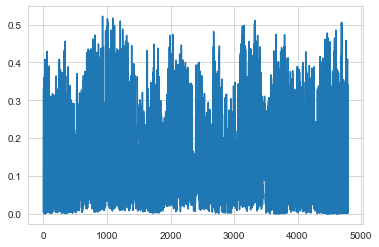

In [7]:
sns.lineplot(x=range(4791), y = wt_rep3_plasmid_join.mean(axis=0))

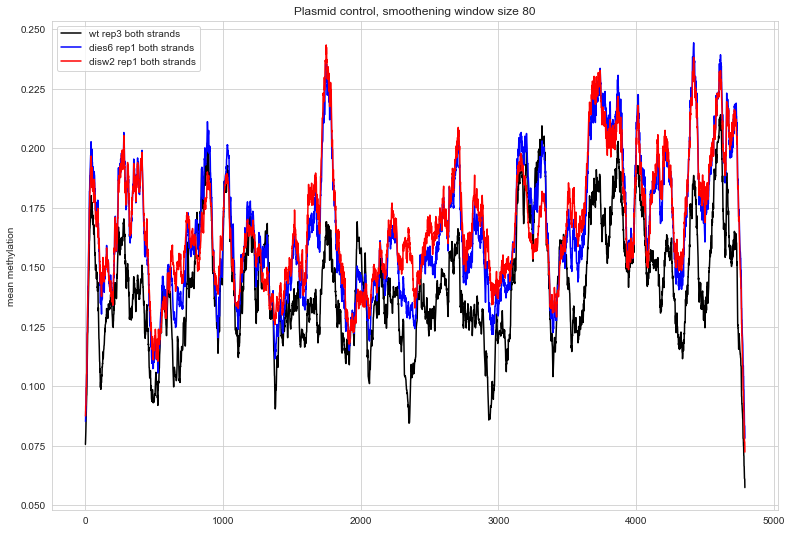

In [8]:
#combine fw and reverse reads and check averaged profile:

N=80
plt.figure(figsize=(13, 9))


sns.lineplot(x = range(4791), y = np.convolve(wt_rep3_plasmid_join.mean(axis=0), np.ones(N)/N, mode="same"),
             color ="black", label="wt rep3 both strands")
sns.lineplot(x = range(4791), y = np.convolve(dies6_rep1_plasmid_join.mean(axis=0), np.ones(N)/N, mode="same"),
             color ="blue", label="dies6 rep1 both strands")
sns.lineplot(x = range(4791), y = np.convolve(disw2_rep1_plasmid_join.mean(axis=0), np.ones(N)/N, mode="same"),
             color ="red", label="disw2 rep1 both strands")
plt.ylabel("mean methylation")
plt.title("Plasmid control, smoothening window size " + str(N))
plt.show()

In [9]:
#overwrite varibale names fro the normlaisation to the plasmid methylation later 
wt_rep3_naked_plasmid = wt_rep3_plasmid_join
wt_rep2_naked_plasmid = wt_rep2_plasmid_join

dies6_rep1_naked = dies6_rep1_plasmid_join
dies6_rep2_naked = dies6_rep2_plasmid_join 

disw2_rep1_naked = disw2_rep1_plasmid_join 
disw2_rep2_naked = disw2_rep2_plasmid_join

## Plot the per base efficiency for the plasmid:

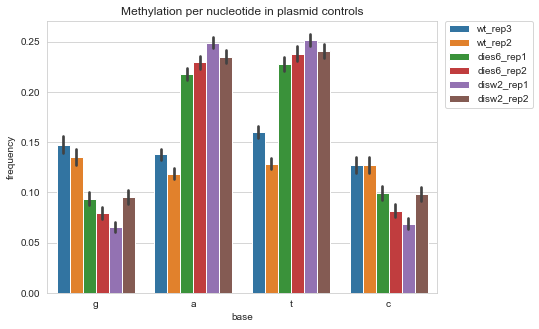

<AxesSubplot:title={'center':'Methylation frequency over samples'}, xlabel='sample', ylabel='normalized frequency of methylation'>

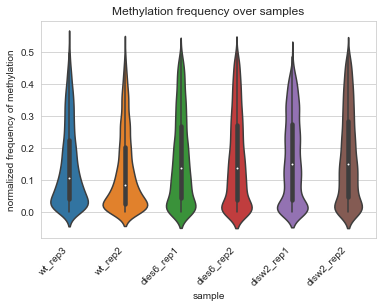

In [10]:
#prepare the data:
seq="ggaagatcctctagagtcgacccgagatcatatcactgtggacgttgatgaaagaatacgttattctttcatcaaatcgtggggctctagggtagttgcgtttctctcattgggacactgaacctcattttccaacattttggtcatgtaagaggcgacaggctcatcgcaggtgggtgcatcaacatggtagtacctggaccaagcgctacattgagtccctcctggataaacaccgctacaatattgtctttggacgtttgcccaaaccatatcttttgaataccaaagctggaccacattgtatggcctaatcattggtgctaccataatactggattgggaaacagtctggttaatttttttcaaccaatttttcttatctagcaatgatttaataaacctgaaatctaaattgtcttcgttagcgtctgtgtcataatctacaattgagtactgtgacgtccaattatatggcaccgagatggggaatctgtccggtgtttcgtcgctgttatccttctcctccctccaaatgaattcctgcagcccgggggatccactagttctagagcggccgccaccgcggtggagctccagcttttgttccctttagtgagggttaatttcgagcttggcgtaatcatggtcatagctgtttcctgtgtgaaattgttatccgctcacaattccacacaacatacgagccggaagcataaagtgtaaagcctggggtgcctaatgagtgagctaactcacattaattgcgttgcgctcactgcccgctttccagtcgggaaacctgtcgtgccagctgcattaatgaatcggccaacgcgcggggagaggcggtttgcgtattgggcgctcttccgcttcctcgctcactgactcgctgcgctcggtcgttcggctgcggcgagcggtatcagctcactcaaaggcggtaatacggttatccacagaatcaggggataacgcaggaaagaacatgtgagcaaaaggccagcaaaaggccaggaaccgtaaaaaggccgcgttgctggcgtttttccataggctccgcccccctgacgagcatcacaaaaatcgacgctcaagtcagaggtggcgaaacccgacaggactataaagataccaggcgtttccccctggaagctccctcgtgcgctctcctgttccgaccctgccgcttaccggatacctgtccgcctttctcccttcgggaagcgtggcgctttctcatagctcacgctgtaggtatctcagttcggtgtaggtcgttcgctccaagctgggctgtgtgcacgaaccccccgttcagcccgaccgctgcgccttatccggtaactatcgtcttgagtccaacccggtaagacacgacttatcgccactggcagcagccactggtaacaggattagcagagcgaggtatgtaggcggtgctacagagttcttgaagtggtggcctaactacggctacactagaaggacagtatttggtatctgcgctctgctgaagccagttaccttcggaaaaagagttggtagctcttgatccggcaaacaaaccaccgctggtagcggtggtttttttgtttgcaagcagcagattacgcgcagaaaaaaaggatctcaagaagatcctttgatcttttctacggggtctgacgctcagtggaacgaaaactcacgttaagggattttggtcatgagattatcaaaaaggatcttcacctagatccttttaaattaaaaatgaagttttaaatcaatctaaagtatatatgagtaaacttggtctgacagttaccaatgcttaatcagtgaggcacctatctcagcgatctgtctatttcgttcatccatagttgcctgactccccgtcgtgtagataactacgatacgggagggcttaccatctggccccagtgctgcaatgataccgcgagacccacgctcaccggctccagatttatcagcaataaaccagccagccggaagggccgagcgcagaagtggtcctgcaactttatccgcctccatccagtctattaattgttgccgggaagctagagtaagtagttcgccagttaatagtttgcgcaacgttgttgccattgctacaggcatcgtggtgtcacgctcgtcgtttggtatggcttcattcagctccggttcccaacgatcaaggcgagttacatgatcccccatgttgtgcaaaaaagcggttagctccttcggtcctccgatcgttgtcagaagtaagttggccgcagtgttatcactcatggttatggcagcactgcataattctcttactgtcatgccatccgtaagatgcttttctgtgactggtgagtactcaaccaagtcattctgagaatagtgtatgcggcgaccgagttgctcttgcccggcgtcaatacgggataataccgcgccacatagcagaactttaaaagtgctcatcattggaaaacgttcttcggggcgaaaactctcaaggatcttaccgctgttgagatccagttcgatgtaacccactcgtgcacccaactgatcttcagcatcttttactttcaccagcgtttctgggtgagcaaaaacaggaaggcaaaatgccgcaaaaaagggaataagggcgacacggaaatgttgaatactcatactcttcctttttcaatattattgaagcatttatcagggttattgtctcatgagcggatacatatttgaatgtatttagaaaaataaacaaataggggttccgcgcacatttccccgaaaagtgccacctaaattgtaagcgttaatattttgttaaaattcgcgttaaatttttgttaaatcagctcattttttaaccaataggccgaaatcggcaaaatcccttataaatcaaaagaatagaccgagatagggttgagtgttgttccagtttggaacaagagtccactattaaagaacgtggactccaacgtcaaagggcgaaaaaccgtctatcagggcgatggcccactacgtgaaccatcaccctaatcaagttttttggggtcgaggtgccgtaaagcactaaatcggaaccctaaagggagcccccgatttagagcttgacggggaaagccggcgaacgtggcgagaaaggaagggaagaaagcgaaaggagcgggcgctagggcgctggcaagtgtagcggtcacgctgcgcgtaaccaccacacccgccgcgcttaatgcgccgctacagggcgcgtcccattcgccattcaggctgcgcaactgttgggaagggcgatcggtgcgggcctcttcgctattacgccagctggcgaaagggggatgtgctgcaaggcgattaagttgggtaacgccagggttttcccagtcacgacgttgtaaaacgacggccagtgaattgtaatacgactcactatagggcgaattgggtaccgggccccccctcgaggtcgacggtatcgataagcttttttgggtcctttgttttcgttgtttcagtctggataaattttaagttaccattatcgaaggcacttttgtacttgtcactaattaaagatgcaatgtcagcggggatactcatttttattttaatttttacttttctgtttgttctaaaatctatctaaactggctttcaagatcaatctattgtcttttaaggtaaactttaaattggaaataatagtaatgttagttccttcattttaaccttgtattgtatttcctttgcgtgatgaaaaaaaaactgaaaaagagaaaaataagaaaatcttctagaacgttccgaaacaggacacttagcacacaaatacagaataggaaagtaaaaggcaatatatgaatgcagtgcttgtaactggtgcttgtatccaagaatagcttcttgctgtaggttatgggaatatcgtgtaagctggggtgacttttgagctattcgcgacgcccgacgccgtaataactactttctcgacccgagatcatatcactgtggacgttgatgaaagaatacgttattctttcatcaaatcgtggtcgaccggcatgcaagctccctcgaggacagaccacttatgacagtatttcaggccgctcttataaaatgacatgttaacaaacagttctgattattcgccttttgacaggacgataatgtaaatagttgtggtagtatcattcaggtatgtaactgtttactttgtatcgcttgaaaaaaataagcatttcagagccttctttggagctcaagtggattgaggccacagcaagaccggccagtttgaatgctcaactcttcaaaagaaattcctcaaatatgtccagtttcatgtactgtccggtgtgatttattattttttatttactttgtagttcttaaagctaagatttttttctttgataaattcttgttttcatatcctaaaattaaagggaaaataaacaatacataacaaaacatataaaaaccaacacaataaaaaaaaggatcaaatactcattaaagtaacttacacgggggctaaaaacggagtttgatgaatattcacaagataaaaatcatatgtatgtttctgatatatcgatatacaatcaaacactttcaagaatttgtttgtagactttttgctagagacctcatcaaagtgctaccaactaagatcaacttatacttcttttagagaaaatttttttcaatgtactccaaagagatttagatcctgtctcttcctcttcctcttcctcgaaagtcaaagaaaaatcagagtctccc"
seq = seq.lower()

eff_df = pd.DataFrame({"wt_rep3": wt_rep3_plasmid_join.mean(axis=0)}, index=range(4791)) 

eff_df["base"] = [letter for letter in seq]

"""
eff_df["wt_rep2"] = wt_rep2_minmax
eff_df["dies6_rep1"] = dies6_rep1_minmax
eff_df["dies6_rep2"] = dies6_rep2_minmax
eff_df["disw2_rep1"] = disw2_rep1_minmax
eff_df["disw2_rep2"] = disw2_rep2_minmax
"""

eff_df["wt_rep2"] = wt_rep2_plasmid_join.mean(axis=0)
eff_df["dies6_rep1"] = dies6_rep1_plasmid_join.mean(axis=0)
eff_df["dies6_rep2"] = dies6_rep2_plasmid_join.mean(axis=0)
eff_df["disw2_rep1"] = disw2_rep1_plasmid_join.mean(axis=0)
eff_df["disw2_rep2"] = disw2_rep2_plasmid_join.mean(axis=0)

eff_df_melt = eff_df.melt(id_vars="base", var_name= "sample", value_name="efficiency")

plt.figure(figsize=(7,5))
sns.barplot(data=eff_df_melt, x = "base", y = "efficiency", hue = "sample")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
plt.title("Methylation per nucleotide in plasmid controls")
plt.ylabel("frequency")
#plt.savefig(load_dir + "/plots/methylation_efficiency_naked_plasmid_per_sample.tif", dpi=300, bbox_inches='tight')
plt.show()

g = sns.violinplot(data = eff_df_melt, x = "sample", y = "efficiency", alpha=0.1)
g.set_ylabel("normalized frequency of methylation")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title("Methylation frequency over samples")

g

## Read in samples for origin ARS305 to set up the annotation of the nucleosome areas

## Wildtype

In [11]:
load_dir =  "ARS305"

In [12]:
ARS305_wt = np.loadtxt("ARS305/wt_mat_Megalodon_repIII_ARS305_end_LexA.txt")
ARS305_wt_rep2 = np.genfromtxt("ARS305/ARS305_wt_REP2_noNA.csv", dtype = int, delimiter = ",") #715 reads

In [13]:
ARS305_wt.shape

(780, 1084)

In [14]:
##feature annotation

##ARS305_anno = pd.read_csv("ARS305/Features_from ARS305_end_LexA _(31 .. 1124).txt", sep  = "\t", 
##                          header = None, index_col = 0)
##ARS305_anno.columns = ["position", "length"]

##ARS305_anno = pd.read_csv("ARS305/coordinates_ARS305.txt", sep  = "\t", 
##                          header = None, index_col = 0)

##Version 3 of annotation with nucleosomes and linker
#ARS305_anno = pd.read_csv(load_dir + "/ARS305_80bp.txt", sep  = "\t", 
#                          header = None, index_col = 0)

##Version 4 of annotation
##ARS305_anno = pd.read_csv(load_dir + "/coordinates_ARS305_v4.csv", sep  = ",", 
##                          header = None, index_col = 0)

#ARS305_anno.columns = ["position"]

#ARS305_anno.index = ARS305_anno.index.astype("string")
#ARS305_anno.index = ARS305_anno.index.str.strip()

#ARS305_anno["pos_start"] = ARS305_anno.position.str.split("-").str[0].astype(int) -1
#ARS305_anno["pos_stop"] = ARS305_anno.position.str.split("-").str[1].astype(int) -1

#ARS305_anno["length"] = ARS305_anno.pos_stop - ARS305_anno.pos_start

In [15]:
#ARS305_anno.rename(index= {'-3ns': "ns-3", 
#                          '-2L': "L-2", 
#                          '-2ns':"ns-2", 
#                          '-1L': "L-1", 
#                          '-1ns': "ns-1", 
#                          'ARS305': "ARS305", 
#                          '+1ns': "ns+1", 
#                          '+2ns':"ns+2", 
#                          '+2L': "L+2",
#                          '+3ns': "ns+3"}, inplace=True)

## An alternative approach to predefined features would be to divide the locus into a number of windows with fixed sizes. Start with a window size of 100-30 nt and test the effect on clustering

In [16]:
windowsize = 30

d = {"pos_start":list(range(0, ARS305_wt.shape[1], windowsize)),
            "pos_stop":list(range((windowsize -1) , ARS305_wt.shape[1], windowsize)) + [ARS305_wt.shape[1]]}
ARS305_anno = pd.DataFrame(d,
            index = list(range(1, ARS305_wt.shape[1]//windowsize + 2)))
ARS305_anno["length"] = (ARS305_anno.pos_stop +1) - ARS305_anno.pos_start

ARS305_anno["position"] = "x"

ARS305_anno.head()

,pos_start,pos_stop,length,position
1,0,29,30,x
2,30,59,30,x
3,60,89,30,x
4,90,119,30,x
5,120,149,30,x


In [17]:
#load data for mutants:
ARS305_dies6_rep1 = np.loadtxt("ARS305/DIES6_ALL_REP1_ARS305_end_LexA.txt")
ARS305_dies6_rep2 = np.genfromtxt("ARS305/DIES6_ARS305_REP2_780READS.csv", dtype = int, delimiter = ",")

ARS305_disw2_rep1 = np.genfromtxt("ARS305/ARS305_disw2_rep1_780READS_noNA.csv", dtype = int,
                                 delimiter = ",")
ARS305_disw2_rep2 = np.genfromtxt("ARS305/ARS305_disw2_rep2_780READS_noNA.csv", dtype = int, delimiter = ",")

In [18]:
#load data for reverse strands:

wt_rep3_rev = np.loadtxt( load_dir + "/wt_repIII_ARS305_end_LexA_minus.txt") #780 reads
wt_rep2_rev = np.loadtxt( load_dir + "/wt_repII_ARS305_minus.txt") #780 reads

dies6_rep1_rev = np.loadtxt(load_dir + "/DIES6_ALL_REP1_ARS305_minus.txt") #780 reads
dies6_rep2_rev = np.loadtxt(load_dir + "/DIES6_ALLstrains_meth_REP2_ARS305_minus.txt") #780 reds

disw2_rep1_rev = np.loadtxt(load_dir + "/REP1_disw2_ARS305_minus.txt") 
disw2_rep2_rev = np.loadtxt(load_dir + "/disw2_all_meth_REP2_ARS305_minus.txt") #780 reads

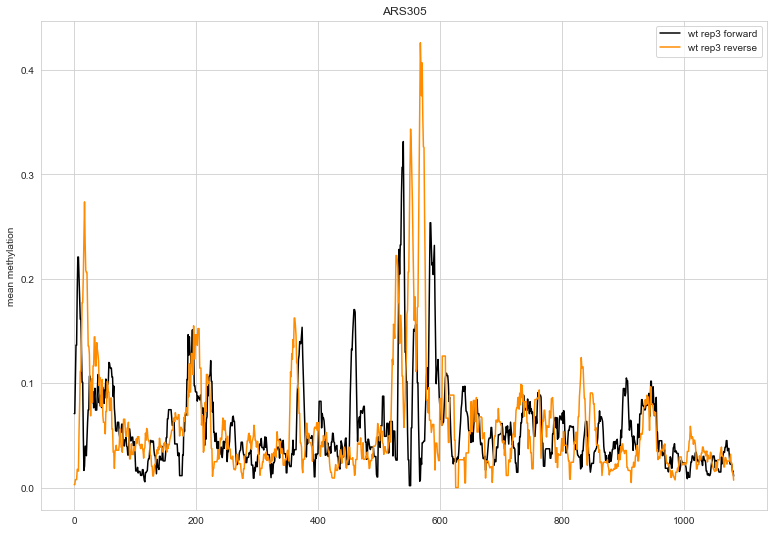

In [19]:
N=10

plt.figure(figsize=(13, 9))
sns.lineplot(x = range(1083), y = np.convolve(ARS305_wt.mean(axis=0)[1:], np.ones(N)/N, mode ="same")
             , color ="black", label="wt rep3 forward")
sns.lineplot(x = range(1083), y = np.convolve(wt_rep3_rev.mean(axis=0), np.ones(N)/N, mode ="same"), 
             color ="darkorange", label="wt rep3 reverse")
plt.ylabel("mean methylation")
plt.title("ARS305")
plt.show()

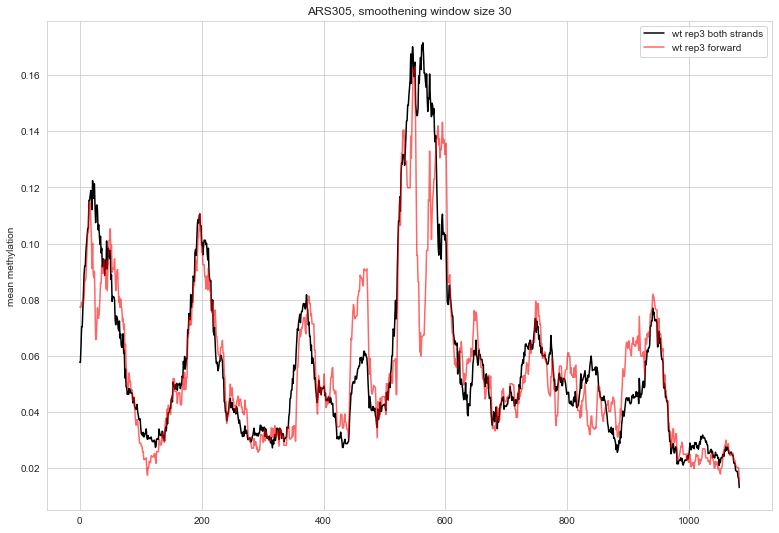

In [20]:
N=30
plt.figure(figsize=(13, 9))
wt_rep3_join = np.concatenate((ARS305_wt[:, 1:], wt_rep3_rev), axis = 0)

sns.lineplot(x = range(1083), y = np.convolve(wt_rep3_join.mean(axis=0), np.ones(N)/N, mode="same"),
             color ="black", label="wt rep3 both strands")
sns.lineplot(x = range(1083), y = np.convolve(ARS305_wt.mean(axis=0)[1:], np.ones(N)/N, mode="same"),
             color ="red", label="wt rep3 forward", alpha =0.6)
plt.ylabel("mean methylation")
plt.title("ARS305, smoothening window size " + str(N))
plt.show()

## Join the matrices for forward and reverse strand

In [21]:
def subsample(array, n):
    np.random.seed(15)
    idx = np.random.randint(len(array), size=n)
    return array[idx,:]

#subsample dies6_rep2_rev to 715 reads
wt_rep2_rev_sub = subsample(wt_rep2_rev, 715)
wt_rep2_join = np.concatenate((ARS305_wt_rep2[:, 1:], wt_rep2_rev_sub), axis = 0)

dies6_rep1_join = np.concatenate((ARS305_dies6_rep1[:, 1:], dies6_rep1_rev), axis = 0)
dies6_rep2_join = np.concatenate((ARS305_dies6_rep2[:, 1:], dies6_rep2_rev), axis = 0)

disw2_rep1_join = np.concatenate((ARS305_disw2_rep1[:, 1:], disw2_rep1_rev), axis = 0)
disw2_rep2_join = np.concatenate((ARS305_disw2_rep2[:, 1:], disw2_rep2_rev), axis = 0)

<AxesSubplot:>

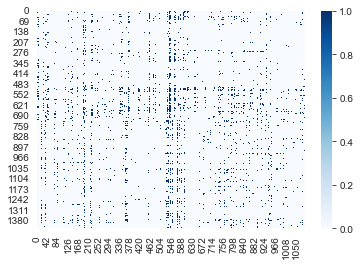

In [22]:
sns.heatmap(wt_rep2_join, cmap="Blues")

In [23]:
#summarise samples
array_dic = {"wt_rep3": wt_rep3_join, 
             "wt_rep2": wt_rep2_join, 
             "dies6_rep1": dies6_rep1_join,
            "dies6_rep2": dies6_rep2_join,
            "disw2_rep1": disw2_rep1_join,
            "disw2_rep2": disw2_rep2_join}

summary=pd.DataFrame()
for element in array_dic.keys():
    summary[element] = pd.DataFrame(array_dic[element].mean(axis=0)).describe()
summary = summary.T
summary["#molecules"] = [array_dic[sample].shape[0] for sample in summary.index]
#summary = summary.T
summary

,count,mean,std,min,25%,50%,75%,max,#molecules
wt_rep3,1083.0,0.057034,0.070619,0.0,0.001923,0.035897,0.080128,0.450000,1560
wt_rep2,1083.0,0.044079,0.056571,0.0,0.000699,0.025874,0.060839,0.369231,1430
dies6_rep1,1083.0,0.073741,0.093714,0.0,0.001282,0.045513,0.107051,0.587821,1560
dies6_rep2,1083.0,0.065112,0.089025,0.0,0.000641,0.037179,0.087821,0.579487,1560
disw2_rep1,1083.0,0.090573,0.111351,0.0,0.000641,0.058974,0.138782,0.687179,1560
disw2_rep2,1083.0,0.090745,0.112197,0.0,0.001923,0.056410,0.135897,0.713462,1560


In [24]:
#assign the old variable names for a quick check for the effects of the reverse strand

ARS305_wt = wt_rep3_join
ARS305_wt_rep2 = wt_rep2_join

ARS305_dies6_rep1 = dies6_rep1_join
ARS305_dies6_rep2 = dies6_rep2_join

ARS305_disw2_rep1 = disw2_rep1_join
ARS305_disw2_rep2 = disw2_rep2_join

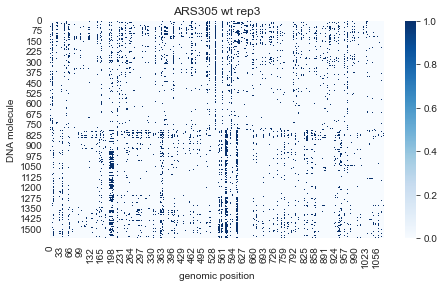

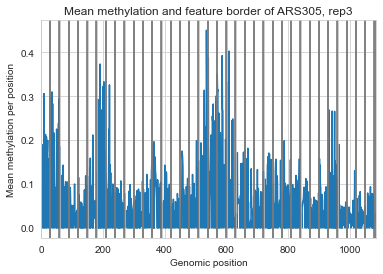

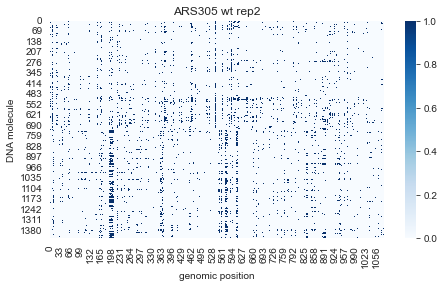

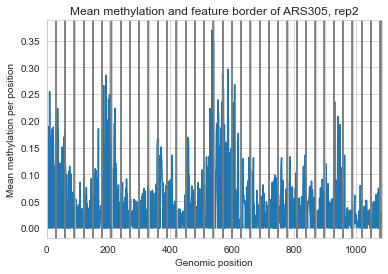

In [25]:
#plot the raw data:
plt.figure(figsize=(7.5,4))
sns.heatmap(ARS305_wt, cmap = "Blues")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.xlim(0, 1084)
plt.title("ARS305 wt rep3")
plt.show()

#and the bulk data:
sns.lineplot(x = range(ARS305_wt.shape[1]), 
                 y = ARS305_wt.mean(axis = 0)
                )
plt.xlabel("Genomic position")
plt.ylabel("Mean methylation per position")
plt.title("Mean methylation and feature border of ARS305, rep3")
plt.xlim(0, 1084)
for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "dimgray")
plt.show()

#wildtype replicate 2:
plt.figure(figsize=(7.5,4))
sns.heatmap(ARS305_wt_rep2, cmap = "Blues")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.xlim(0, 1084)
plt.title("ARS305 wt rep2")
plt.show()

sns.lineplot(x = range(ARS305_wt.shape[1]), 
                 y = ARS305_wt_rep2.mean(axis = 0)
                )
plt.xlabel("Genomic position")
plt.ylabel("Mean methylation per position")
plt.title("Mean methylation and feature border of ARS305, rep2")
plt.xlim(0, 1084)
for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "dimgray")
plt.show()

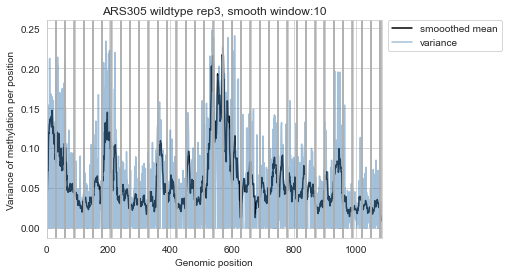

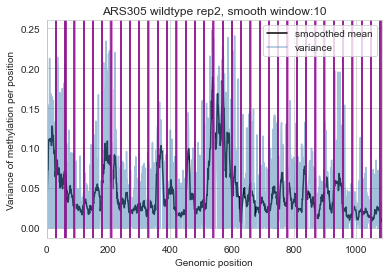

In [26]:
N = 10

sns.lineplot(x = range(ARS305_wt.shape[1]), 
                 y = np.convolve(ARS305_wt.mean(axis = 0), np.ones(N)/N, mode ="same"),
             color = "black", label = "smooothed mean")
#plt.ylabel("Mean methylation over sample")
plt.xlim(0, ARS305_wt.shape[1])
plt.title("ARS305 wildtype rep3, smooth window:" + str(N))


sns.lineplot(x = range(ARS305_wt.shape[1]), 
            y = ARS305_wt.std(axis = 0)**2, color = "steelblue", alpha = 0.5,
            label = "variance"
            )
plt.ylabel("Variance of methylation per position")
plt.xlabel("Genomic position")
plt.xlim(0, 1084)
for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "darkgray")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
plt.show()
    
# Compare that the other replicate
sns.lineplot(x = range(ARS305_wt.shape[1]), 
                 y = np.convolve(ARS305_wt_rep2.mean(axis = 0), np.ones(N)/N, mode ="same"),
             color = "black", label = "smooothed mean")
#plt.ylabel("Mean methylation over sample")
plt.xlim(0, ARS305_wt.shape[1])
plt.title("ARS305 wildtype rep2, smooth window:" + str(N))
sns.lineplot(x = range(ARS305_wt.shape[1]), 
            y = ARS305_wt.std(axis = 0)**2, color = "steelblue", alpha = 0.5,
            label = "variance"
            )
plt.ylabel("Variance of methylation per position")
plt.xlabel("Genomic position")
plt.axvline(62, color = "purple", label = "border")
plt.xlim(0, 1084)
for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "orchid")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "purple")
plt.show()
    

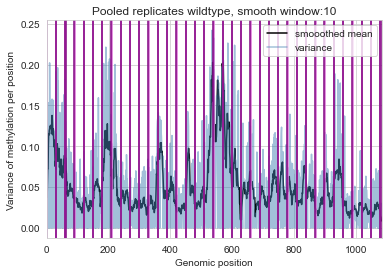

In [27]:
# Concatenate the wildtype replicates and plot the mean and the variance again:

joined_wt = np.concatenate((ARS305_wt, ARS305_wt_rep2), axis = 0)

sns.lineplot(x = range(joined_wt.shape[1]), 
                 y = np.convolve(joined_wt.mean(axis = 0), np.ones(N)/N, mode ="same"),
             color = "black", label = "smooothed mean")
#plt.ylabel("Mean methylation over sample")
plt.xlim(0, joined_wt.shape[1])
plt.title("Pooled replicates wildtype, smooth window:" + str(N))


sns.lineplot(x = range(ARS305_wt.shape[1]), 
            y = joined_wt.std(axis = 0)**2, color = "steelblue", alpha = 0.5,
            label = "variance"
            )
plt.ylabel("Variance of methylation per position")
plt.xlabel("Genomic position")
plt.axvline(62, color = "purple", label = "border")
plt.xlim(0, 1084)
for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "orchid")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "purple")
plt.show()

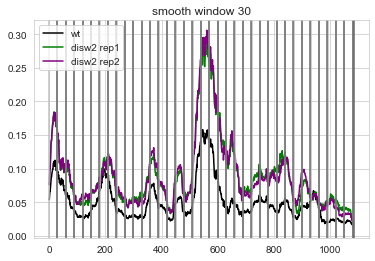

In [28]:
smooth_width = 30

sns.lineplot(x = range(joined_wt.shape[1]), 
                 y = np.convolve(joined_wt.mean(axis = 0), np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "black", label = "wt")
sns.lineplot(x = range(joined_wt.shape[1]), 
                 y = np.convolve(ARS305_disw2_rep1.mean(axis = 0), np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "green", label = "disw2 rep1")
sns.lineplot(x = range(joined_wt.shape[1]), 
                 y = np.convolve(ARS305_disw2_rep2.mean(axis = 0), np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "purple", label = "disw2 rep2")
plt.title("smooth window " + str(smooth_width))

for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "dimgray")
    
plt.show()

## Normalize each experiment to maximum values, and pool replicates

In [29]:
"""wt_rep3_minmax = ARS305_wt.mean(axis = 0)/ARS305_wt.mean(axis = 0).max()
wt_rep2_minmax = ARS305_wt_rep2.mean(axis = 0)/ARS305_wt_rep2.mean(axis = 0).max()

pooled_wt = np.concatenate((wt_rep3_minmax.reshape(1, -1), wt_rep2_minmax.reshape(1,-1)), axis = 0).mean(axis = 0)

#dies6
dies6_rep1_minmax = ARS305_dies6_rep1.mean(axis = 0)/ARS305_dies6_rep1.mean(axis = 0).max()
dies6_rep2_minmax = ARS305_dies6_rep2.mean(axis = 0)/ARS305_dies6_rep2.mean(axis = 0).max()

pooled_dies6 = np.concatenate((dies6_rep1_minmax.reshape(1, -1), dies6_rep2_minmax.reshape(1,-1)), axis = 0).mean(axis = 0)

#disw2
disw2_rep1_minmax = ARS305_disw2_rep1.mean(axis = 0)/ARS305_disw2_rep1.mean(axis = 0).max()
disw2_rep2_minmax = ARS305_disw2_rep2.mean(axis = 0)/ARS305_disw2_rep2.mean(axis = 0).max()

pooled_disw2 = np.concatenate((disw2_rep1_minmax.reshape(1, -1), disw2_rep2_minmax.reshape(1,-1)), axis = 0).mean(axis = 0)"""

'wt_rep3_minmax = ARS305_wt.mean(axis = 0)/ARS305_wt.mean(axis = 0).max()\nwt_rep2_minmax = ARS305_wt_rep2.mean(axis = 0)/ARS305_wt_rep2.mean(axis = 0).max()\n\npooled_wt = np.concatenate((wt_rep3_minmax.reshape(1, -1), wt_rep2_minmax.reshape(1,-1)), axis = 0).mean(axis = 0)\n\n#dies6\ndies6_rep1_minmax = ARS305_dies6_rep1.mean(axis = 0)/ARS305_dies6_rep1.mean(axis = 0).max()\ndies6_rep2_minmax = ARS305_dies6_rep2.mean(axis = 0)/ARS305_dies6_rep2.mean(axis = 0).max()\n\npooled_dies6 = np.concatenate((dies6_rep1_minmax.reshape(1, -1), dies6_rep2_minmax.reshape(1,-1)), axis = 0).mean(axis = 0)\n\n#disw2\ndisw2_rep1_minmax = ARS305_disw2_rep1.mean(axis = 0)/ARS305_disw2_rep1.mean(axis = 0).max()\ndisw2_rep2_minmax = ARS305_disw2_rep2.mean(axis = 0)/ARS305_disw2_rep2.mean(axis = 0).max()\n\npooled_disw2 = np.concatenate((disw2_rep1_minmax.reshape(1, -1), disw2_rep2_minmax.reshape(1,-1)), axis = 0).mean(axis = 0)'

## Normalize each experiment to mean values, and pool replicates

In [30]:
#normalization to the sample mean methylation frequency
"""
wt_rep3_minmax = ARS305_wt.mean(axis = 0)/ARS305_wt.flatten().mean(axis=0)
wt_rep2_minmax = ARS305_wt_rep2.mean(axis = 0)/ARS305_wt_rep2.flatten().mean(axis=0)

pooled_wt = np.concatenate((wt_rep3_minmax.reshape(1, -1), wt_rep2_minmax.reshape(1,-1)), axis = 0).mean(axis = 0)

#dies6
dies6_rep1_minmax = ARS305_dies6_rep1.mean(axis = 0)/ARS305_dies6_rep1.flatten().mean(axis=0)
dies6_rep2_minmax = ARS305_dies6_rep2.mean(axis = 0)/ARS305_dies6_rep2.flatten().mean(axis=0)

pooled_dies6 = np.concatenate((dies6_rep1_minmax.reshape(1, -1), dies6_rep2_minmax.reshape(1,-1)), axis = 0).mean(axis = 0)

#disw2
disw2_rep1_minmax = ARS305_disw2_rep1.mean(axis = 0)/ARS305_disw2_rep1.flatten().mean(axis=0)
disw2_rep2_minmax = ARS305_disw2_rep2.mean(axis = 0)/ARS305_disw2_rep2.flatten().mean(axis=0)

pooled_disw2 = np.concatenate((disw2_rep1_minmax.reshape(1, -1), disw2_rep2_minmax.reshape(1,-1)), axis = 0).mean(axis = 0)"""

#normalisation to the mean methylation freq of the spike in of nucleosomal arrays
mean_array_wt_rep3 = 0.048283
mean_array_wt_rep2 = 0.034160
mean_array_dies6_rep1=0.050732
mean_array_dies6_rep2 = 0.045048
mean_array_disw2_rep1 = 0.061350
mean_array_disw2_rep2 = 0.059359

wt_rep3_minmax = ARS305_wt.mean(axis = 0)/mean_array_wt_rep3
wt_rep2_minmax = ARS305_wt_rep2.mean(axis = 0)/mean_array_wt_rep2

pooled_wt = np.concatenate((wt_rep3_minmax.reshape(1, -1), wt_rep2_minmax.reshape(1,-1)), axis = 0).mean(axis = 0)

#dies6
dies6_rep1_minmax = ARS305_dies6_rep1.mean(axis = 0)/mean_array_dies6_rep1
dies6_rep2_minmax = ARS305_dies6_rep2.mean(axis = 0)/mean_array_dies6_rep2

pooled_dies6 = np.concatenate((dies6_rep1_minmax.reshape(1, -1), dies6_rep2_minmax.reshape(1,-1)), axis = 0).mean(axis = 0)

#disw2
disw2_rep1_minmax = ARS305_disw2_rep1.mean(axis = 0)/mean_array_disw2_rep1
disw2_rep2_minmax = ARS305_disw2_rep2.mean(axis = 0)/mean_array_disw2_rep2

pooled_disw2 = np.concatenate((disw2_rep1_minmax.reshape(1, -1), disw2_rep2_minmax.reshape(1,-1)), axis = 0).mean(axis = 0)



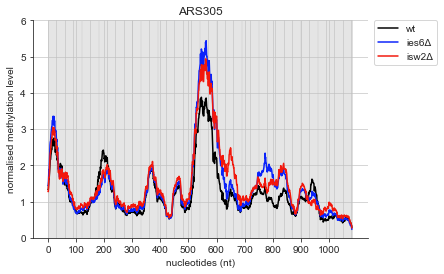

In [31]:
N=30

with sns.axes_style("ticks", {'axes.grid': True, 'axes.spines.right': False, 'axes.spines.top': False}):
        sns.lineplot(x = range(wt_rep3_minmax.shape[0]),
             y = np.convolve(pooled_wt, np.ones(N)/N, mode="same"), #wt_min_max
             color = "black", 
            label = "wt")
        sns.lineplot(x = range(wt_rep3_minmax.shape[0]),
             y = np.convolve(pooled_dies6, np.ones(N)/N, mode="same"), #dies6_min_max
             color = "#0a22fa",# alpha = 0.7,
            label = "ies6Δ")
        sns.lineplot(x = range(wt_rep3_minmax.shape[0]),
            y = np.convolve(pooled_disw2, np.ones(N)/N, mode = "same"), #disw2_min_max
            color = "#f2180c",# alpha = 0.7,
            label = "isw2Δ")
        plt.title(load_dir 
          #+  ", mean normalised and pooled, smoothened with " + str(N)
                  )
        for feature in ARS305_anno.index:
            plt.fill_betweenx(range(0,7), 
                      ARS305_anno.loc[feature, "pos_start"],
                      ARS305_anno.loc[feature, "pos_stop"], 
                      color = "silver", alpha = 0.4)
        plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
        plt.ylim(0, 6)
        plt.xticks(range(0, wt_rep3_minmax.shape[0], 100))
        plt.xlabel("nucleotides (nt)")
        plt.ylabel("normalised methylation level")
        #plt.savefig(load_dir + "/plots/ARS305_smoothed_profiles_wt_mut_revision.pdf", dpi=300, bbox_inches = "tight")
        plt.show()

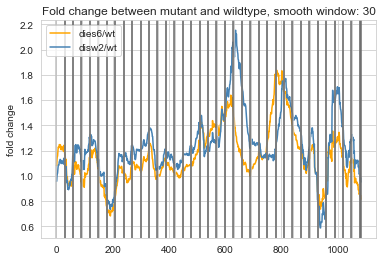

In [32]:
N=30
sns.lineplot(x = range(pooled_wt.shape[0]),
             y = np.convolve(pooled_dies6, np.ones(N)/N, mode="same")/np.convolve(pooled_wt, np.ones(N)/N, mode="same"),
            color = "orange", 
             label = "dies6/wt")
sns.lineplot(x = range(pooled_wt.shape[0]),
             y = np.convolve(pooled_disw2, np.ones(N)/N, mode="same")/np.convolve(pooled_wt, np.ones(N)/N, mode="same"),
            color = "steelblue",
             label = "disw2/wt")
plt.ylabel("fold change")
plt.title("Fold change between mutant and wildtype, smooth window: " + str(N))
for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "dimgray")

### Compare mean distributions between pooled replicates and wildtype with paired wilcoxon test

In [33]:
segments = ARS305_anno.drop(columns = "position")

#list comprehension to catch the pooled methylation values per sample in a cell per column
array_list = [pooled_wt[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]

segments["wt_mean"] = pd.Series(array_list, index = segments.index)

#dies6 mutant 
array_list = [pooled_dies6[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]

segments["dies6_mean"] = pd.Series(array_list, index = segments.index)

#disw2 mutant

array_list = [pooled_disw2[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]

segments["disw2_mean"] = pd.Series(array_list, index = segments.index)

In [34]:
segments["p_value_dies6"] = [wilcoxon(segments.loc[index, "wt_mean"], 
                                                segments.loc[index,"dies6_mean"],
                                                alternative = "two-sided").pvalue for index in segments.index]

segments["p_value_disw2"] = [wilcoxon(segments.loc[index, "wt_mean"], 
                                                segments.loc[index,"disw2_mean"],
                                                alternative = "two-sided").pvalue for index in segments.index]
segments.drop(segments.columns[3:6], axis =1, inplace = True)

In [35]:
segments
#segments.to_csv(load_dir + "/ARS305_pooled_samples_two-sided-test.csv")

,pos_start,pos_stop,length,p_value_dies6,p_value_disw2
1,0,29,30,0.008685,0.027306
2,30,59,30,0.986134,0.715145
3,60,89,30,0.123045,0.036257
4,90,119,30,0.637818,0.177876
5,120,149,30,0.022809,0.017270
6,150,179,30,0.569934,0.445498
7,180,209,30,0.005111,0.018675
8,210,239,30,0.177876,0.026155
9,240,269,30,0.543016,0.149178
10,270,299,30,0.100506,0.001405


In [36]:
#Regions significant for dies6 and disw2:
pvalue = 2.5e-2

print("       Which sites have a different mean methylation mutants compared to wildtype?")
print("       P-value below: ", pvalue)
significant = segments.loc[(segments["p_value_dies6"] < pvalue) | (segments["p_value_disw2"] < pvalue)]
significant

       Which sites have a different mean methylation mutants compared to wildtype?
       P-value below:  0.025


,pos_start,pos_stop,length,p_value_dies6,p_value_disw2
1,0,29,30,0.008685,0.027306
5,120,149,30,0.022809,0.017270
7,180,209,30,0.005111,0.018675
10,270,299,30,0.100506,0.001405
11,300,329,30,0.026399,0.000295
12,330,359,30,0.223757,0.000588
13,360,389,30,0.011867,0.010817
16,450,479,30,0.008146,0.000091
17,480,509,30,0.055347,0.005644
18,510,539,30,0.000127,0.000233


In [37]:
##Regions significant for disw2:
#print("       Which sites have a different mean methylation in the disw2 mutant?")
#print("       P-value below: ", pvalue)
#segments.loc[(segments["p_value_disw2"] < pvalue)]

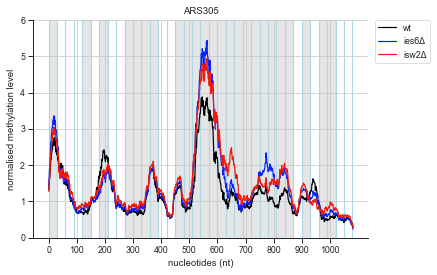

In [38]:
N=30
sns.set_context("paper")
with sns.axes_style("ticks", {'axes.grid': True, 'axes.spines.right': False, 'axes.spines.top': False}):
        for left_border in ARS305_anno.loc[:, "pos_start"]:
            plt.axvline(left_border, color = "lightblue")
        for feature in significant.index:
            plt.fill_betweenx(range(0,7), 
                      significant.loc[feature, "pos_start"],
                      significant.loc[feature, "pos_stop"], 
                      color = "silver", alpha = 0.4)
        sns.lineplot(x = range(wt_rep3_minmax.shape[0]),
             y = np.convolve(pooled_wt, np.ones(N)/N, mode="same"),
             color = "black", 
            label = "wt")
        sns.lineplot(x = range(wt_rep3_minmax.shape[0]),
             y = np.convolve(pooled_dies6, np.ones(N)/N, mode="same"), 
             color = "#0a22fa",# alpha = 0.7,
            label = "ies6Δ")
        sns.lineplot(x = range(wt_rep3_minmax.shape[0]),
            y = np.convolve(pooled_disw2, np.ones(N)/N, mode = "same"), 
            color = "#f2180c",# alpha = 0.7,
            label = "isw2Δ")
        plt.title(load_dir 
          #+  ", mean normalised and pooled, smoothened with " + str(N)
                  )
        plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
        plt.ylim(0, 6)
        plt.xticks(range(0, wt_rep3_minmax.shape[0], 100))
        plt.xlabel("nucleotides (nt)")
        plt.ylabel("normalised methylation level")
        #plt.savefig(load_dir + "/plots/ARS305_smoothed_profiles_revision_window30_union_selection.pdf", dpi=300, bbox_inches = "tight")
        plt.show()

### Compare pooled wildtype to mutant replicates, then filter regions

In [39]:
segments = ARS305_anno.drop(columns = "position")

#list comprehension to catch the pooled methylation values per sample in a cell per column
array_list = [pooled_wt[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]

segments["wt_mean"] = pd.Series(array_list, index = segments.index)

#dies6 mutant 
array_list = [dies6_rep1_minmax[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["dies6_mean_rep1"] = pd.Series(array_list, index = segments.index)

array_list = [dies6_rep2_minmax[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["dies6_mean_rep2"] = pd.Series(array_list, index = segments.index)


#disw2 mutant
array_list = [disw2_rep1_minmax[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["disw2_mean_rep1"] = pd.Series(array_list, index = segments.index)

array_list = [disw2_rep2_minmax[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["disw2_mean_rep2"] = pd.Series(array_list, index = segments.index)

#perform statistical test
segments["p_value_dies6_rep1"] = [wilcoxon(segments.loc[index, "wt_mean"], 
                                                segments.loc[index,"dies6_mean_rep1"],
                                                alternative = "two-sided").pvalue for index in segments.index]
segments["p_value_dies6_rep2"] = [wilcoxon(segments.loc[index, "wt_mean"], 
                                                segments.loc[index,"dies6_mean_rep2"],
                                                alternative = "two-sided").pvalue for index in segments.index]

segments["p_value_disw2_rep1"] = [wilcoxon(segments.loc[index, "wt_mean"], 
                                                segments.loc[index,"disw2_mean_rep1"],
                                                alternative = "two-sided").pvalue for index in segments.index]
segments["p_value_disw2_rep2"] = [wilcoxon(segments.loc[index, "wt_mean"], 
                                                segments.loc[index,"disw2_mean_rep2"],
                                                alternative = "two-sided").pvalue for index in segments.index]
segments.drop(segments.columns[3:8], axis =1, inplace = True)

In [40]:
segments
#segments.to_csv(load_dir + "/AR305_separate_replicates_two-sided-test.csv")

,pos_start,pos_stop,length,p_value_dies6_rep1,p_value_dies6_rep2,p_value_disw2_rep1,p_value_disw2_rep2
1,0,29,30,0.014269,0.004137,0.022809,0.029829
2,30,59,30,0.614271,0.903175,0.520213,0.875710
3,60,89,30,0.076831,0.389602,0.057533,0.020271
4,90,119,30,0.526681,0.637818,0.157875,0.211326
5,120,149,30,0.029829,0.015707,0.049552,0.009613
6,150,179,30,0.684874,0.426376,0.661179,0.485170
7,180,209,30,0.005734,0.004550,0.022769,0.030365
8,210,239,30,0.076831,0.371961,0.042448,0.017022
9,240,269,30,0.230474,0.053725,0.375445,0.042020
10,270,299,30,0.008905,0.605118,0.002603,0.002127


In [41]:
#Regions significant for dies6:
pvalue = 5e-2

print("       Which sites have a different mean methylation in the dies6 mutant?")
print("       P-value below: ", pvalue)
segments.loc[(segments["p_value_dies6_rep1"] < pvalue) &
            (segments["p_value_dies6_rep2"] < pvalue)]

       Which sites have a different mean methylation in the dies6 mutant?
       P-value below:  0.05


,pos_start,pos_stop,length,p_value_dies6_rep1,p_value_dies6_rep2,p_value_disw2_rep1,p_value_disw2_rep2
1,0,29,30,0.014269,0.004137,0.022809,0.029829
5,120,149,30,0.029829,0.015707,0.049552,0.009613
7,180,209,30,0.005734,0.004550,0.022769,0.030365
13,360,389,30,0.017022,0.030853,0.088298,0.008962
18,510,539,30,0.000183,0.000207,0.000526,0.000144
19,540,569,30,0.000046,0.000046,0.000155,0.000046
20,570,599,30,0.000112,0.000087,0.000735,0.000207
21,600,629,30,0.000041,0.000101,0.000081,0.000016
22,630,659,30,0.000144,0.000821,0.000060,0.000052
25,720,749,30,0.000780,0.013741,0.002204,0.036561


In [42]:
#Regions significant for disw2:
pvalue = 5e-2

print("       Which sites have a different mean methylation in the disw2 mutant?")
print("       P-value below: ", pvalue)
segments.loc[(segments["p_value_disw2_rep1"] < pvalue) &
            (segments["p_value_disw2_rep2"] < pvalue)]

       Which sites have a different mean methylation in the disw2 mutant?
       P-value below:  0.05


,pos_start,pos_stop,length,p_value_dies6_rep1,p_value_dies6_rep2,p_value_disw2_rep1,p_value_disw2_rep2
1,0,29,30,0.014269,0.004137,0.022809,0.029829
5,120,149,30,0.029829,0.015707,0.049552,0.009613
7,180,209,30,0.005734,0.004550,0.022769,0.030365
8,210,239,30,0.076831,0.371961,0.042448,0.017022
10,270,299,30,0.008905,0.605118,0.002603,0.002127
11,300,329,30,0.002876,0.951495,0.000821,0.000526
12,330,359,30,0.094362,0.879128,0.004675,0.000144
16,450,479,30,0.003302,0.148536,0.014240,0.000260
17,480,509,30,0.059332,0.051588,0.011588,0.002876
18,510,539,30,0.000183,0.000207,0.000526,0.000144


### Use peak detection to characterise peaks of the entire origin

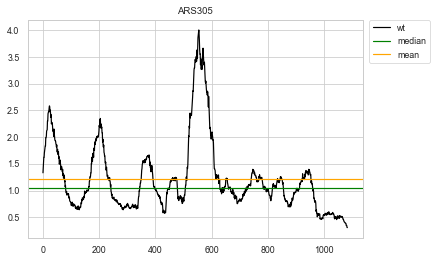

In [43]:
N=40
pooled_wt_smoothed = np.convolve(pooled_wt, np.ones(N)/N, mode="same")

sns.lineplot(x = range(wt_rep3_minmax.shape[0]),
             y = pooled_wt_smoothed, color = "black", label = "wt")
plt.axhline(np.median(pooled_wt_smoothed,axis=0), color ="green", label = "median")
plt.axhline(np.mean(pooled_wt_smoothed,axis=0), color ="orange", label = "mean")
plt.title(load_dir)
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0,
          labels = ["wt", "median", "mean"])

In [44]:
from scipy import signal

x = pooled_wt_smoothed#[580:820]
peaks, properties = signal.find_peaks(x, width=20, 
                               rel_height=0.9,
                               #prominence = (None, 0.8), 
                               height= np.median(x)
                              )
properties

{'peak_heights': array([2.58406913, 2.34893968, 1.66658906, 1.24803231, 4.00516571,
        1.23264794, 1.39680862, 1.26069953, 1.39656548]),
 'prominences': array([1.25226166, 1.70826536, 1.02671236, 0.48995695, 3.42908848,
        0.29402312, 0.6429764 , 0.45196183, 0.70661857]),
 'left_bases': array([  0, 129, 285, 432, 432, 635, 691, 810, 878]),
 'right_bases': array([ 432,  432,  432,  495, 1082,  691, 1082,  878, 1082]),
 'widths': array([ 61.60151635, 118.85840981,  82.78645101,  54.44338971,
        175.22166833,  30.68949706, 105.1343583 ,  47.95370677,
         86.28812728]),
 'width_heights': array([1.45703364, 0.81150085, 0.74254794, 0.80707106, 0.91898608,
        0.96802712, 0.81812986, 0.85393388, 0.76060876]),
 'left_ips': array([  1.13802915, 139.04306786, 338.07481768, 438.25162229,
        504.15619824, 639.01770762, 704.69096008, 810.91430813,
        883.47541983]),
 'right_ips': array([ 62.73954549, 257.90147768, 420.86126868, 492.695012  ,
        679.37786657, 6

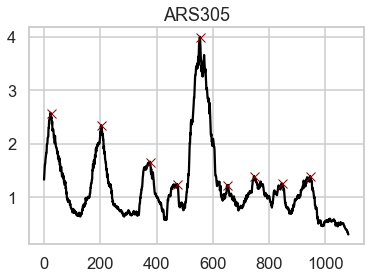

In [45]:
sns.set_context("talk")

plt.plot(x, color = "black")
plt.plot(peaks, x[peaks], "x", color = "darkred")
#plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"],
#            xmax=properties["right_ips"], color = "darkred")

#plt.text(x = properties["left_ips"],y=properties["width_heights"], s = ("width: " + str(int(properties["widths"]))),
#         fontsize = 13, color="darkred")
plt.title(load_dir)
plt.show()

In [46]:
print(properties["peak_heights"].mean(axis=0))
print(properties["prominences"].mean(axis=0))

1.904390828126162
1.1113183040125556


### Use peak detection to estimate the size of the nucleosome-free region

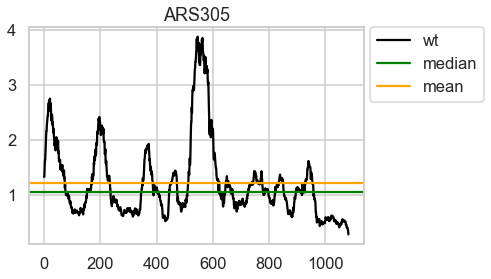

In [47]:
N=30
pooled_wt_smoothed = np.convolve(pooled_wt, np.ones(N)/N, mode="same")

sns.lineplot(x = range(wt_rep3_minmax.shape[0]),
             y = pooled_wt_smoothed, color = "black", label = "wt")
plt.axhline(np.median(pooled_wt_smoothed,axis=0), color ="green", label = "median")
plt.axhline(np.mean(pooled_wt_smoothed,axis=0), color ="orange", label = "mean")
plt.title(load_dir)
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0,
          labels = ["wt", "median", "mean"])

In [48]:
from scipy import signal

x = pooled_wt_smoothed[580:820]
peaks, properties = signal.find_peaks(x, width=30
                              )
properties

{'prominences': array([0.624772]),
 'left_bases': array([105]),
 'right_bases': array([235]),
 'widths': array([48.92251106]),
 'width_heights': array([1.1218143]),
 'left_ips': array([148.44471842]),
 'right_ips': array([197.36722948])}

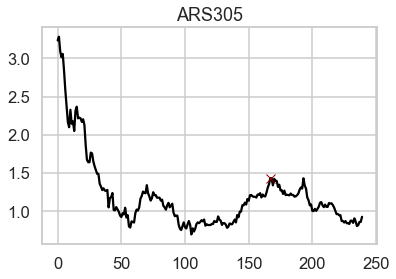

In [49]:
sns.set_context("talk")

plt.plot(x, color = "black")
plt.plot(peaks, x[peaks], "x", color = "darkred")
#plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"],
#            xmax=properties["right_ips"], color = "darkred")

#plt.text(x = properties["left_ips"],y=properties["width_heights"], s = ("width: " + str(int(properties["widths"]))),
#         fontsize = 13, color="darkred")
plt.title(load_dir)
plt.show()

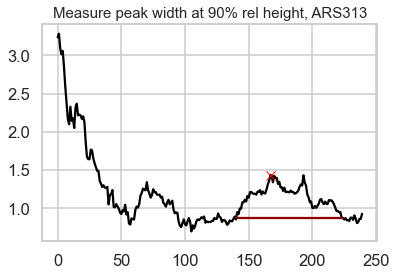

In [50]:
signal.peak_widths(x, peaks, rel_height = 0.9)[0]

plt.plot(x, color = "black")
plt.plot(peaks, x[peaks], "x", color = "red")
plt.hlines(*signal.peak_widths(x, peaks, rel_height = 0.9)[1:], color ="darkred")
plt.title( "Measure peak width at 90% rel height, ARS313", fontsize = 15)

pooled_dies6_smoothed = np.convolve(pooled_dies6, np.ones(N)/N, mode = "same")[480:659]
pooled_disw2_smoothed = np.convolve(pooled_disw2, np.ones(N)/N, mode = "same")[480:659]

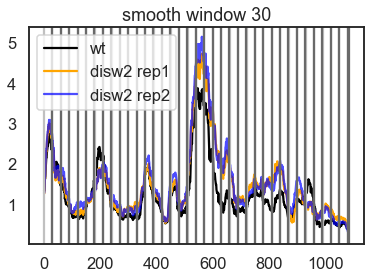

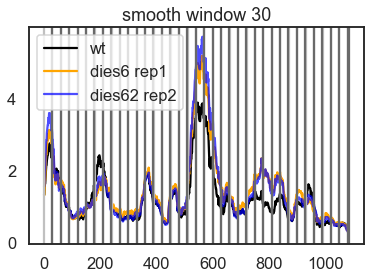

In [51]:
# How does that look over the whole sequence?

sns.set_style("white")
smooth_width = 30

sns.lineplot(x = range(pooled_wt.shape[0]), 
                 y = np.convolve(pooled_wt, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "black", label = "wt")
sns.lineplot(x = range(pooled_wt.shape[0]), 
                 y = np.convolve(disw2_rep1_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "orange", label = "disw2 rep1")
sns.lineplot(x = range(pooled_wt.shape[0]), 
                 y = np.convolve(disw2_rep2_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "blue", alpha = 0.7, label = "disw2 rep2")
plt.title("smooth window " + str(smooth_width))

for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "dimgray")
    
plt.show()

sns.lineplot(x = range(pooled_wt.shape[0]), 
                 y = np.convolve(pooled_wt, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "black", label = "wt")
sns.lineplot(x = range(pooled_wt.shape[0]), 
                 y = np.convolve(dies6_rep1_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "orange", label = "dies6 rep1")
sns.lineplot(x = range(pooled_wt.shape[0]), 
                 y = np.convolve(dies6_rep2_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "blue", alpha = 0.7, label = "dies62 rep2")
plt.title("smooth window " + str(smooth_width))

for border in ARS305_anno.loc[:, "pos_start"]:
    plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    plt.axvline(border, color = "dimgray")
    
plt.show()

### Normalize part of the ARS305 sequence to part of the naked plasmid 

bases 4082 - 4791 in the naked plasmid correspond to 
223 - 932 in ARS305

they contain: L-1, NS-1, ARS305, NS+1, L+1 and a part of NS+2

In [52]:
#subset the overlap in between the sequences

overlap_plasmid_wt3 = wt_rep3_naked_plasmid[:, 4081:4791]
overlap_plasmid_wt2 = wt_rep2_naked_plasmid[:, 4081:4791]

overlap_plasmid_dies6_1 = dies6_rep1_naked[:, 4081:4791]
overlap_plasmid_dies6_2 = dies6_rep2_naked[:, 4081:4791]

overlap_plasmid_disw2_1 = disw2_rep1_naked[:, 4081:4791]
overlap_plasmid_disw2_2 = disw2_rep2_naked[:, 4081:4791]

overlap_ARS305_wt3 = ARS305_wt[:, 223:933]
overlap_ARS305_wt2 = ARS305_wt_rep2[:, 223:933]

overlap_ARS305_dies6_1 = ARS305_dies6_rep1[:, 223:933]
overlap_ARS305_dies6_2 = ARS305_dies6_rep2[:, 223:933]
overlap_ARS305_disw2_1 = ARS305_disw2_rep1[:, 223:933]
overlap_ARS305_disw2_2 = ARS305_disw2_rep2[:, 223:933]

<AxesSubplot:>

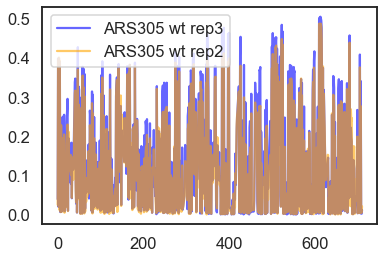

In [53]:
sns.lineplot(x = range(overlap_ARS305_wt3.shape[1]), y = overlap_plasmid_wt3.mean(axis = 0), 
             color = "blue", label = "ARS305 wt rep3", alpha = 0.6)
sns.lineplot(x = range(overlap_ARS305_wt3.shape[1]), y = overlap_plasmid_wt2.mean(axis = 0), 
             color = "orange", label = "ARS305 wt rep2", alpha = 0.6)

In [54]:
overlap_plasmid_wt_joined = np.concatenate((overlap_plasmid_wt3, overlap_plasmid_wt2), axis = 0).mean(axis=0)

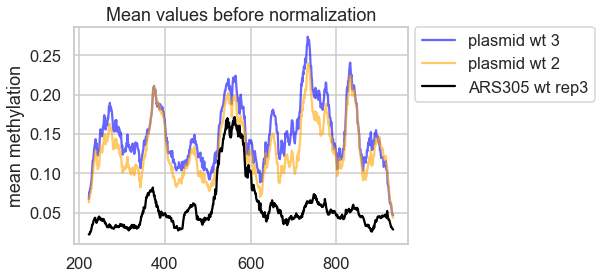

In [55]:
N=30

sns.set_style("whitegrid")
sns.lineplot(x = range(223,933), 
             y = np.convolve(overlap_plasmid_wt3.mean(axis = 0), np.ones(N)/N, mode ="same"), 
             color = "blue", label = "plasmid wt 3", alpha = 0.6)
sns.lineplot(x = range(223,933), 
             y = np.convolve(overlap_plasmid_wt2.mean(axis = 0), np.ones(N)/N, mode ="same"), 
             color = "orange", label = "plasmid wt 2", alpha = 0.6)
#sns.lineplot(x = range(overlap_ARS305.shape[1]), 
#             y = np.convolve(overlap_plasmid_wt_joined, np.ones(N)/N, mode ="same"), 
#             color = "darkgreen", label = "joined plasmids", alpha = 0.6)
sns.lineplot(x = range(223,933), 
             y = np.convolve(overlap_ARS305_wt3.mean(axis = 0), np.ones(N)/N, mode ="same"), 
             color = "black", label = "ARS305 wt rep3")
plt.ylabel("mean methylation")
plt.title("Mean values before normalization")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

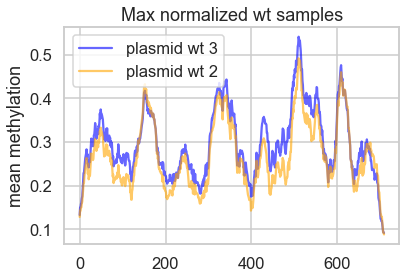

Text(0.5, 1.0, 'Max normalized samples averaged by condition')

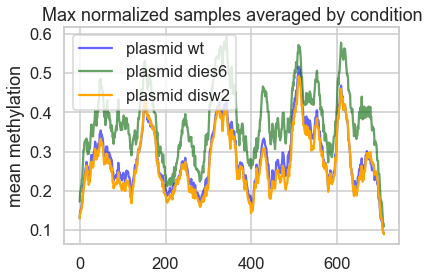

In [56]:
#before normalization, max-scale replicates, pool and average

#plasmid control wt
overlap_wt3_maxnorm = wt_rep3_naked_plasmid[:, 4081:4791].mean(axis=0)/wt_rep3_naked_plasmid[:, 4081:4791].mean(axis=0).max()
overlap_wt2_maxnorm = wt_rep2_naked_plasmid[:, 4081:4791].mean(axis=0)/wt_rep2_naked_plasmid[:, 4081:4791].mean(axis=0).max()

sns.lineplot(x = range(710), 
             y = np.convolve(overlap_wt3_maxnorm, np.ones(N)/N, mode ="same"), 
             color = "blue", label = "plasmid wt 3", alpha = 0.6)
sns.lineplot(x = range(710), 
             y = np.convolve(overlap_wt2_maxnorm, np.ones(N)/N, mode ="same"), 
             color = "orange", label = "plasmid wt 2", alpha = 0.6)
plt.ylabel("mean methylation")
plt.title("Max normalized wt samples")
plt.show()

overlap_wt_maxnorm = np.concatenate((overlap_wt3_maxnorm.reshape(-1, 710),
                                     overlap_wt2_maxnorm.reshape(-1, 710)), axis = 0).mean(axis=0)
#plasmid control for dies6
overlap_dies61_maxnorm = dies6_rep1_naked[:, 4081:4791].mean(axis=0)/dies6_rep1_naked[:, 4081:4791].mean(axis=0).max()
overlap_dies62_maxnorm = dies6_rep2_naked[:, 4081:4791].mean(axis=0)/dies6_rep2_naked[:, 4081:4791].mean(axis=0).max()
overlap_dies6_maxnorm = np.concatenate((overlap_dies61_maxnorm.reshape(-1, 710),
                                     overlap_dies62_maxnorm.reshape(-1, 710)), axis = 0).mean(axis=0)

#plasmid control for disw2
overlap_disw21_maxnorm = disw2_rep1_naked[:, 4081:4791].mean(axis=0)/disw2_rep1_naked[:, 4081:4791].mean(axis=0).max()
overlap_disw22_maxnorm = disw2_rep2_naked[:, 4081:4791].mean(axis=0)/disw2_rep2_naked[:, 4081:4791].mean(axis=0).max()
overlap_disw2_maxnorm = np.concatenate((overlap_disw21_maxnorm.reshape(-1, 710),
                                     overlap_disw22_maxnorm.reshape(-1, 710)), axis = 0).mean(axis=0)

sns.lineplot(x = range(710), 
             y = np.convolve(overlap_wt_maxnorm, np.ones(N)/N, mode ="same"), 
             color = "blue", label = "plasmid wt", alpha = 0.6)
sns.lineplot(x = range(710), 
             y = np.convolve(overlap_dies6_maxnorm, np.ones(N)/N, mode ="same"), 
             color = "darkgreen", label = "plasmid dies6", alpha = 0.6)
sns.lineplot(x = range(710), 
             y = np.convolve(overlap_wt2_maxnorm, np.ones(N)/N, mode ="same"), 
             color = "orange", label = "plasmid disw2")
plt.ylabel("mean methylation")
plt.title("Max normalized samples averaged by condition")

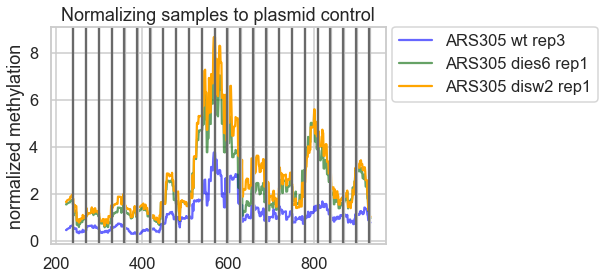

In [57]:
#normalize conditions for ARS305 to the respective plasmid control
# here, normalize each sample from the origin to the pooled control from the respective plasmid sample
norm_overlap_ARS305_wt3 = (overlap_ARS305_wt3.mean(axis=0)+ 0.01)/(overlap_wt_maxnorm+0.01)
norm_overlap_ARS305_dies6_rep1 = (overlap_ARS305_dies6_1.mean(axis=0)+ 0.01)/(overlap_dies6_maxnorm+0.01)
norm_overlap_ARS305_disw2_rep1 = (overlap_ARS305_disw2_1.mean(axis=0)+ 0.01)/(overlap_disw2_maxnorm+0.01)

N=30

sns.lineplot(x = range(223,933), 
             y = np.convolve(norm_overlap_ARS305_wt3, np.ones(N)/N, mode ="same"), 
             color = "blue", label = "ARS305 wt rep3", alpha = 0.6)
sns.lineplot(x = range(223,933), 
             y = np.convolve(norm_overlap_ARS305_dies6_rep1, np.ones(N)/N, mode ="same"), 
             color = "darkgreen", label = "ARS305 dies6 rep1", alpha = 0.6)
sns.lineplot(x = range(223,933), 
             y = np.convolve(norm_overlap_ARS305_disw2_rep1, np.ones(N)/N, mode ="same"), 
             color = "orange", label = "ARS305 disw2 rep1")
plt.ylabel("normalized methylation")
plt.title("Normalizing samples to plasmid control")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

for border in ARS305_anno.loc[:, "pos_start"]:
    if 222 < border < 935:
        plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    if 222 < border < 935:
        plt.axvline(border, color = "dimgray")

Normalize origin ARS305 to part of the plasmid sequence (without scaling)


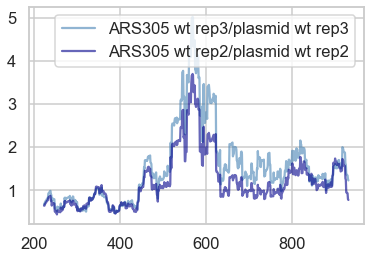

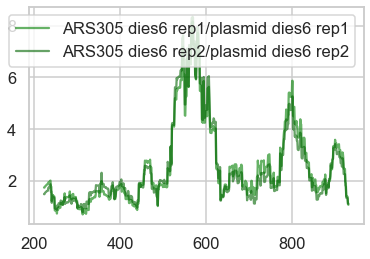

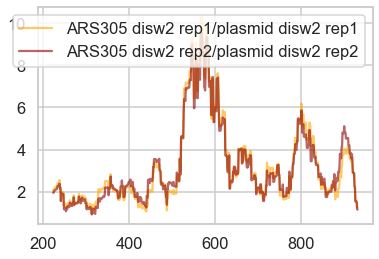

In [58]:
# Different approach: Normalize samples in between experiments - ARS305 wt rep3 to plasmid wt rep3
print("Normalize origin ARS305 to part of the plasmid sequence (without scaling)")
sns.lineplot(x = range(223,933), 
             y = np.convolve((ARS305_wt[:, 223:933].mean(axis = 0)+0.01)/(wt_rep3_naked_plasmid[:, 4081:4791].mean(axis = 0)+0.01), 
                             np.ones(N)/N, mode ="same"), 
             color = "steelblue", label = "ARS305 wt rep3/plasmid wt rep3", alpha = 0.6)
sns.lineplot(x = range(223,933), 
             y = np.convolve((ARS305_wt_rep2[:, 223:933].mean(axis = 0)+0.01)/(wt_rep2_naked_plasmid[:, 4081:4791].mean(axis = 0)+0.01), 
                             np.ones(N)/N, mode ="same"), 
             color = "darkblue", label = "ARS305 wt rep2/plasmid wt rep2", alpha = 0.6)
plt.show()

sns.lineplot(x = range(223,933), 
             y = np.convolve((ARS305_dies6_rep1[:, 223:933].mean(axis = 0)+0.01)/(dies6_rep1_naked[:, 4081:4791].mean(axis = 0)+0.01), 
                             np.ones(N)/N, mode ="same"), 
             color = "green", label = "ARS305 dies6 rep1/plasmid dies6 rep1", alpha = 0.6)
sns.lineplot(x = range(223,933), 
             y = np.convolve((ARS305_dies6_rep2[:, 223:933].mean(axis = 0)+0.01)/(dies6_rep2_naked[:, 4081:4791].mean(axis = 0)+0.01), 
                             np.ones(N)/N, mode ="same"), 
             color = "darkgreen", label = "ARS305 dies6 rep2/plasmid dies6 rep2", alpha = 0.6)
plt.show()


sns.lineplot(x = range(223,933), 
             y = np.convolve((ARS305_disw2_rep1[:, 223:933].mean(axis = 0)+0.01)/(disw2_rep1_naked[:, 4081:4791].mean(axis = 0)+0.01), 
                             np.ones(N)/N, mode ="same"), 
             color = "orange", label = "ARS305 disw2 rep1/plasmid disw2 rep1", alpha = 0.6)
sns.lineplot(x = range(223,933), 
             y = np.convolve((ARS305_disw2_rep2[:, 223:933].mean(axis = 0)+0.01)/(disw2_rep2_naked[:, 4081:4791].mean(axis = 0)+0.01), 
                             np.ones(N)/N, mode ="same"), 
             color = "darkred", label = "ARS305 disw2 rep2/plasmid disw2 rep2", alpha = 0.6)
plt.show()

In [59]:
#Pool replicates per condition and compare the plasmid control
e = 0.05

ARS305_wt3_norm = (ARS305_wt[:, 223:933].mean(axis = 0)+e)/(wt_rep3_naked_plasmid[:, 4081:4791].mean(axis = 0)+e)
ARS305_wt2_norm = (ARS305_wt_rep2[:, 223:933].mean(axis = 0)+e)/(wt_rep2_naked_plasmid[:, 4081:4791].mean(axis = 0)+e)
ARS305_wt_norm_pooled = np.concatenate((ARS305_wt3_norm.reshape(-1, 710), ARS305_wt3_norm.reshape(-1, 710)), axis=0).mean(axis = 0)

ARS305_dies61_norm = (ARS305_dies6_rep1[:, 223:933].mean(axis = 0)+e)/(dies6_rep1_naked[:, 4081:4791].mean(axis = 0)+e)
ARS305_dies62_norm = (ARS305_dies6_rep2[:, 223:933].mean(axis = 0)+e)/(dies6_rep2_naked[:, 4081:4791].mean(axis = 0)+e) 
ARS305_dies6_norm_pooled = np.concatenate((ARS305_dies61_norm.reshape(-1, 710), ARS305_dies62_norm.reshape(-1, 710)), axis=0).mean(axis = 0)

ARS305_disw21_norm = (ARS305_disw2_rep1[:, 223:933].mean(axis = 0)+e)/(disw2_rep1_naked[:, 4081:4791].mean(axis = 0)+e)
ARS305_disw22_norm = (ARS305_disw2_rep2[:, 223:933].mean(axis = 0)+e)/(disw2_rep2_naked[:, 4081:4791].mean(axis = 0)+e)
ARS305_disw2_norm_pooled = np.concatenate((ARS305_disw21_norm.reshape(-1, 710), ARS305_disw22_norm.reshape(-1, 710)), axis=0).mean(axis = 0)

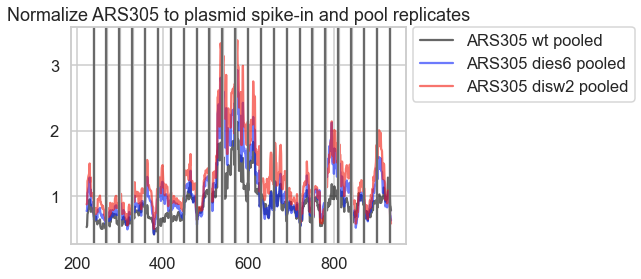

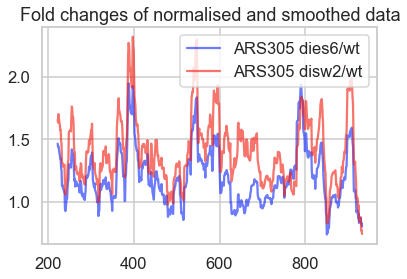

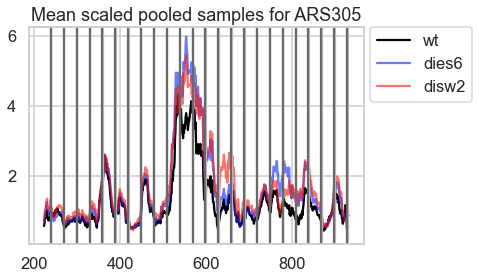

In [60]:
N= 15
sns.set_style("whitegrid")
sns.lineplot(x = range(223,933), 
             y = np.convolve(ARS305_wt_norm_pooled, 
                             np.ones(N)/N, mode ="same"), 
             color = "black", label = "ARS305 wt pooled", alpha = 0.6)
sns.lineplot(x = range(223,933), 
             y = np.convolve(ARS305_dies6_norm_pooled, 
                             np.ones(N)/N, mode ="same"), 
             color = "#0a22fa", label = "ARS305 dies6 pooled", alpha = 0.6)
sns.lineplot(x = range(223,933), 
             y = np.convolve(ARS305_disw2_norm_pooled, 
                             np.ones(N)/N, mode ="same"), 
             color = "#f2180c", label = "ARS305 disw2 pooled", alpha = 0.6)
plt.title("Normalize ARS305 to plasmid spike-in and pool replicates")

for border in ARS305_anno.loc[:, "pos_start"]:
    if 222 < border < 935:
        plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    if 222 < border < 935:
        plt.axvline(border, color = "dimgray")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
#plt.savefig("controls/ARS305_plasmid_norm_pooled_samples.png", dpi=300)
plt.show()

sns.lineplot(x = range(223,933), 
             y = np.convolve(ARS305_dies6_norm_pooled, np.ones(N)/N, mode ="same")/np.convolve(ARS305_wt_norm_pooled, 
                             np.ones(N)/N, mode ="same"), 
             color = "#0a22fa", label = "ARS305 dies6/wt", alpha = 0.6)
sns.lineplot(x = range(223,933), 
             y = np.convolve(ARS305_disw2_norm_pooled, np.ones(N)/N, mode ="same")/np.convolve(ARS305_wt_norm_pooled, 
                             np.ones(N)/N, mode ="same"), 
             color = "#f2180c", label = "ARS305 disw2/wt", alpha = 0.6)
plt.title("Fold changes of normalised and smoothed data")
plt.show()

#compare trend to max scaled dsitributions from pooled data:
sns.lineplot(x = range(223,933),
             y = np.convolve(pooled_wt[223:933], np.ones(N)/N, mode="same"),
             color = "black", 
            label = "wt")
sns.lineplot(x = range(223,933),
             y = np.convolve(pooled_dies6[223:933], np.ones(N)/N, mode="same"),
             color = "#0a22fa", alpha = 0.6,
            label = "dies6")
sns.lineplot(x = range(223,933),
            y = np.convolve(pooled_disw2[223:933], np.ones(N)/N, mode = "same"),
            color = "#f2180c", alpha = 0.6,
            label = "disw2")
plt.title("Mean scaled pooled samples for ARS305")
for border in ARS305_anno.loc[:, "pos_start"]:
    if 222 < border < 935:
        plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    if 222 < border < 935:
        plt.axvline(border, color = "dimgray")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
#plt.savefig("controls/ARS305_max_norm_pooled_samples.png", dpi=300)
plt.show()

## Search for differentially methylated features in data that was normalised to plasmid data

In [61]:
overlap_annotation = ARS305_anno.drop(columns="position")

# for plasmid normalised data, we don't have values for -3ns, -2L, +2ns, +L, +3ns. So, discard these rows

#use for anno v3
overlap_annotation.drop(overlap_annotation.index[[0,1, 8,9]], axis = 0, inplace=True)
#use for anno v4
#overlap_annotation.drop(overlap_annotation.index[[0]], axis = 0, inplace=True)

#move boundaries for annotation to the context of the excised part of the origin
overlap_annotation.pos_start -= 223
overlap_annotation.pos_stop -= 223
segments = overlap_annotation.copy()

In [62]:
segments

,pos_start,pos_stop,length
3,-163,-134,30
4,-133,-104,30
5,-103,-74,30
6,-73,-44,30
7,-43,-14,30
8,-13,16,30
11,77,106,30
12,107,136,30
13,137,166,30
14,167,196,30


In [63]:
#list comprehension to catch the pooled methylation values per sample in a cell per column
array_list = [ARS305_wt_norm_pooled[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]

segments["wt_norm_plasmid"] = pd.Series(array_list, index = segments.index)

#dies6 mutant 
array_list = [ARS305_dies6_norm_pooled[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["dies6_norm_plasmid"] = pd.Series(array_list, index = segments.index)

#disw2 mutant
array_list = [ARS305_disw2_norm_pooled[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["disw2_norm_plasmid"] = pd.Series(array_list, index = segments.index)
segments

,pos_start,pos_stop,length,wt_norm_plasmid,dies6_norm_plasmid,disw2_norm_plasmid
3,-163,-134,30,"[0.23104200763775232, 0.30298277475097685, 2.2...","[0.22165163463506005, 0.43036628764864165, 3.1...","[0.198452725631207, 0.34330068232478206, 2.574..."
4,-133,-104,30,"[0.7007883064052768, 2.285476609904091, 0.2367...","[0.7025370756220124, 3.5796474358974355, 0.192...","[0.7333667074215628, 4.131712962962963, 0.1673..."
5,-103,-74,30,"[0.7675701287111405, 2.8157430694071053, 0.091...","[0.6992316530231223, 4.334757834757834, 0.0925...","[0.7957559681697612, 4.948323170731707, 0.0972..."
6,-73,-44,30,"[1.4887793609114257, 1.1732960167359283, 0.437...","[1.4821705426356588, 1.1139240506329116, 0.341...","[1.7177873222748814, 1.1666666666666667, 0.423..."
7,-43,-14,30,"[0.78644382544104, 0.20768004794921743, 1.9143...","[0.9349698535745047, 0.23774452269170582, 2.70...","[0.9454892741698502, 0.27765280827557814, 3.21..."
8,-13,16,30,[],[],[]
11,77,106,30,"[0.3784154504553934, 0.18508378193559666, 1.59...","[0.2561356311267683, 0.12215896800582071, 2.01...","[0.3114319512076199, 0.1250424340584956, 2.465..."
12,107,136,30,"[0.15365620451353762, 0.6864320929290201, 0.92...","[0.1217890348469226, 0.5508401284902396, 0.975...","[0.12646801295325988, 0.6385462555066079, 0.95..."
13,137,166,30,"[0.15495977059494975, 0.556788430370278, 0.673...","[0.12217460074493597, 0.5607871195178348, 0.91...","[0.13382363276739725, 0.7697114618205005, 0.88..."
14,167,196,30,"[0.8014003216955247, 0.16280321377772652, 0.29...","[1.5128782195548887, 0.1332647637215943, 0.806...","[1.348949016100179, 0.12861861467439156, 0.736..."


In [64]:
#sns.lineplot(x=range(80), y= segments.loc["ARS305","wt_norm_plasmid"], color="black")
#sns.lineplot(x=range(80), y= segments.loc["ARS305","dies6_norm_plasmid"], color= "red")

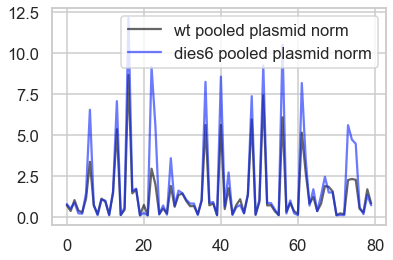

<AxesSubplot:>

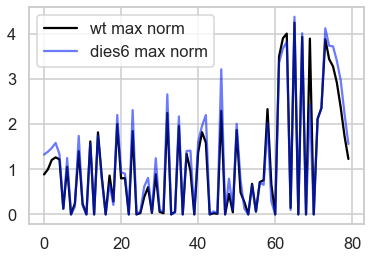

In [65]:
N=1
sns.lineplot(x = range(80), 
             y = np.convolve(ARS305_wt_norm_pooled[296:376], 
                             np.ones(N)/N, mode ="same"), 
             color = "black", label = "wt pooled plasmid norm", alpha = 0.6)
sns.lineplot(x = range(80), 
             y = np.convolve(ARS305_dies6_norm_pooled[296:376], 
                             np.ones(N)/N, mode ="same"), 
             color = "#0a22fa", label = "dies6 pooled plasmid norm", alpha = 0.6)
plt.show()

sns.lineplot(x = range(80),
             y = np.convolve(pooled_wt[296:376], np.ones(N)/N, mode="same"),
             color = "black", 
            label = "wt max norm")
sns.lineplot(x = range(80),
             y = np.convolve(pooled_dies6[296:376], np.ones(N)/N, mode="same"),
             color = "#0a22fa", alpha = 0.6,
            label = "dies6 max norm")

In [67]:
#print(pooled_wt[296:376])
#print(pooled_dies6[296:376])
print(wilcoxon(ARS305_wt_norm_pooled[296:376], ARS305_dies6_norm_pooled[296:376], alternative="two-sided"))
wilcoxon(pooled_wt[296:376], pooled_dies6[296:376], alternative="two-sided")

WilcoxonResult(statistic=861.0, pvalue=0.0002722338714574178)


WilcoxonResult(statistic=510.0, pvalue=0.00039354134553042347)

In [71]:
#perform statistical test
#segments["p_value_dies6"] = [wilcoxon(segments.loc[index, "wt_norm_plasmid"], 
#                                                segments.loc[index,"dies6_norm_plasmid"],
#                                                alternative = "two-sided").pvalue for index in segments.index]
#segments["p_value_disw2"] = [wilcoxon(segments.loc[index, "wt_norm_plasmid"], 
#                                                segments.loc[index,"disw2_norm_plasmid"],
#                                                alternative = "two-sided").pvalue for index in segments.index]
#segments.drop(segments.columns[3:6], axis =1, inplace = True)

#segments

## Calculate statistics for separate replicates

In [68]:
segments = overlap_annotation.copy()

#list comprehension to catch the pooled methylation values per sample in a cell per column
array_list = [ARS305_wt_norm_pooled[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]

segments["wt_norm_plasmid"] = pd.Series(array_list, index = segments.index)

#dies6 mutant 
array_list = [ARS305_dies61_norm[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["dies6_rep1_norm_plasmid"] = pd.Series(array_list, index = segments.index)

array_list = [ARS305_dies62_norm[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["dies6_rep2_norm_plasmid"] = pd.Series(array_list, index = segments.index)


#disw2 mutant
array_list = [ARS305_disw21_norm[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["disw2_rep1_norm_plasmid"] = pd.Series(array_list, index = segments.index)

array_list = [ARS305_disw22_norm[segments.loc[index, "pos_start"]:segments.loc[index, "pos_stop"]] for 
 index in segments.index]
segments["disw2_rep2_norm_plasmid"] = pd.Series(array_list, index = segments.index)

In [72]:
#perform statistical test
#segments["p_value_dies6_rep1"] = [wilcoxon(segments.loc[index, "wt_norm_plasmid"], 
#                                                segments.loc[index,"dies6_rep1_norm_plasmid"],
#                                                alternative = "two-sided").pvalue for index in segments.index]
#segments["p_value_dies6_rep2"] = [wilcoxon(segments.loc[index, "wt_norm_plasmid"], 
#                                                segments.loc[index,"dies6_rep2_norm_plasmid"],
#                                                alternative = "two-sided").pvalue for index in segments.index]

#segments["p_value_disw2_rep1"] = [wilcoxon(segments.loc[index, "wt_norm_plasmid"], 
#                                                segments.loc[index,"disw2_rep1_norm_plasmid"],
#                                                alternative = "two-sided").pvalue for index in segments.index]
#segments["p_value_disw2_rep2"] = [wilcoxon(segments.loc[index, "wt_norm_plasmid"], 
#                                                segments.loc[index,"disw2_rep2_norm_plasmid"],
#                                                alternative = "two-sided").pvalue for index in segments.index]
#segments.drop(segments.columns[3:8], axis =1, inplace = True)

In [74]:
#Regions significant for dies6:
#pvalue = 5e-2#

#print("       Which sites have a different mean methylation in the dies6 mutant?")
#print("       P-value below: ", pvalue)
#segments.loc[(segments["p_value_dies6_rep1"] < pvalue) &
#            (segments["p_value_dies6_rep2"] < pvalue)]

In [75]:
#Regions significant for disw2:
#pvalue = 5e-2

#print("       Which sites have a different mean methylation in the disw2 mutant?")
#print("       P-value below: ", pvalue)
#segments.loc[(segments["p_value_disw2_rep1"] < pvalue) &
#            (segments["p_value_disw2_rep2"] < pvalue)]

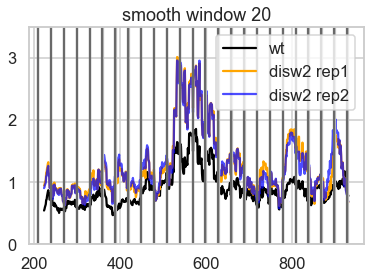

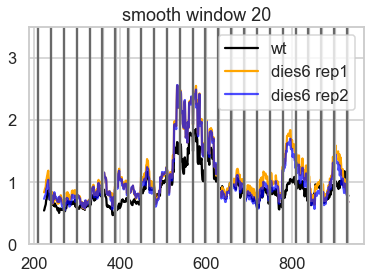

In [76]:
smooth_width = 20

sns.lineplot(x = range(223,933), 
                 y = np.convolve(ARS305_wt_norm_pooled, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "black", label = "wt")
sns.lineplot(x = range(223,933), 
                 y = np.convolve(ARS305_disw21_norm, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "orange", label = "disw2 rep1")
sns.lineplot(x = range(223,933), 
                 y = np.convolve(ARS305_disw22_norm, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "blue", alpha = 0.7, label = "disw2 rep2")
plt.title("smooth window " + str(smooth_width))
#plt.fill_betweenx(y=[0,2], x1=649, x2=729, color="silver")
plt.ylim(0,3.5)

for border in ARS305_anno.loc[:, "pos_start"]:
    if 200 < border < 940:
        plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    if 200 < border < 940:
        plt.axvline(border, color = "dimgray")
    
plt.show()

sns.lineplot(x = range(223,933), 
                 y = np.convolve(ARS305_wt_norm_pooled, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "black", label = "wt")
sns.lineplot(x = range(223,933), 
                 y = np.convolve(ARS305_dies61_norm, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "orange", label = "dies6 rep1")
sns.lineplot(x = range(223,933), 
                 y = np.convolve(ARS305_dies62_norm, np.ones(smooth_width)/smooth_width, mode ="same"),
             color = "blue", alpha = 0.7, label = "dies6 rep2")
plt.title("smooth window " + str(smooth_width))
plt.ylim(0,3.5)

for border in ARS305_anno.loc[:, "pos_start"]:
    if 200 < border < 940:
        plt.axvline(border, color = "silver")
for border in ARS305_anno.loc[:, "pos_stop"]:
    if 200 < border < 940:
        plt.axvline(border, color = "dimgray")
    
plt.show()

## Compare average methylation per feature

In [77]:
#Display the mean methylation per feature

def condense_features(array, anno):
    output = np.empty(array.shape[0],)
    for index in anno.index:
        feature_array = array[:, anno.loc[index, "pos_start"]: anno.loc[index, "pos_stop"]]
        means_by_feature = np.apply_along_axis(np.mean, 1, feature_array)
        #means_by_feature = np.apply_along_axis(np.std, 1, feature_array)**2 #to calculate variance
        output = np.column_stack((output, means_by_feature))
    return output[:, 1:]

def max_normalise_array(array):
    return array/array.mean(axis=0).max()

In [78]:
#20230214: for the fixed window size approach, only select significantly different regions
saved = ARS305_anno.copy()
ARS305_anno = ARS305_anno.iloc[(ARS305_anno.index.intersection(significant.index)-1),:]

In [79]:
"""#normalize the count matrices to the max of averages of the respective sample
wt_rep3_maxnorm = max_normalise_array(wt_rep3)
wt_rep2_maxnorm = max_normalise_array(wt_rep2)

dies6_rep1_maxnorm = max_normalise_array(dies6_rep1)
dies6_rep2_maxnorm = max_normalise_array(dies6_rep2)

disw2_rep1_maxnorm = max_normalise_array(disw2_rep1)
disw2_rep2_maxnorm = max_normalise_array(disw2_rep2)
"""

#normalise the count matrices to the mean methylation frequency of the nucleosomal array spike-in controls
#normalise to the nucleosomal array spike-ins

wt_rep3_maxnorm = ARS305_wt/mean_array_wt_rep3
wt_rep2_maxnorm = ARS305_wt_rep2/mean_array_wt_rep2

dies6_rep1_maxnorm = ARS305_dies6_rep1/mean_array_dies6_rep1
dies6_rep2_maxnorm = ARS305_dies6_rep2/mean_array_dies6_rep2

disw2_rep1_maxnorm = ARS305_disw2_rep1/mean_array_disw2_rep1
disw2_rep2_maxnorm = ARS305_disw2_rep2/mean_array_disw2_rep2

#condense methylation by feature

wt_rep3_feat_me = condense_features(wt_rep3_maxnorm, ARS305_anno)
wt_rep2_feat_me = condense_features(wt_rep2_maxnorm, ARS305_anno)
wt_pool = np.concatenate((wt_rep3_feat_me, wt_rep2_feat_me), axis = 0)

dies6_rep1_feat_me = condense_features(dies6_rep1_maxnorm, ARS305_anno)
dies6_rep2_feat_me = condense_features(dies6_rep2_maxnorm, ARS305_anno)
dies6_pool = np.concatenate((dies6_rep1_feat_me, dies6_rep2_feat_me), axis= 0)

disw2_rep1_feat_me = condense_features(disw2_rep1_maxnorm, ARS305_anno)
disw2_rep2_feat_me = condense_features(disw2_rep2_maxnorm, ARS305_anno)
disw2_pool = np.concatenate((disw2_rep1_feat_me, disw2_rep2_feat_me), axis = 0)

Comparing replicates


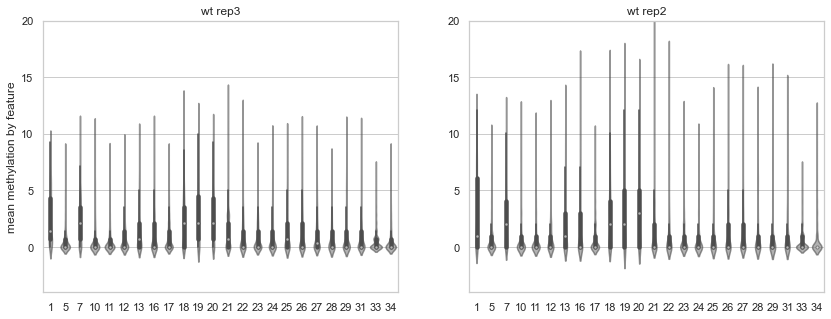

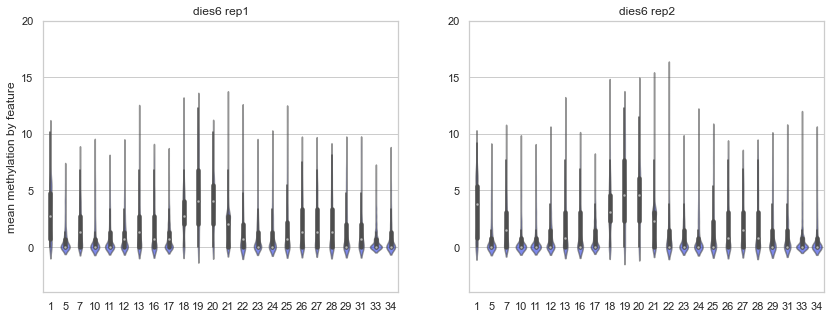

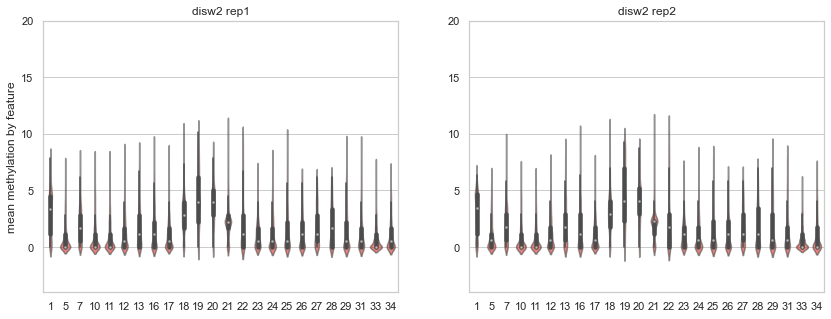

In [80]:
sns.set(font_scale=1)
sns.set_style("whitegrid")

print("Comparing replicates")
#wt
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (14,5))

sns.violinplot(data = wt_rep3_feat_me, axis = 1, color = "grey", ax=ax1)
ax1.set_title("wt rep3")
ax1.set_xticklabels(ARS305_anno.index)
ax1.set_ylim(-4, 20)
ax1.set_ylabel("mean methylation by feature")
plt.setp(ax1.collections, alpha = 0.6)

sns.violinplot(data = wt_rep2_feat_me, axis = 1, color = "grey", ax=ax2)
ax2.set_title("wt rep2")
ax2.set_xticklabels(ARS305_anno.index)
ax2.set_ylim(-4, 20)
plt.setp(ax2.collections, alpha = 0.6)
#plt.savefig(load_dir + "/plots/ARS305_methylation_by_feature_wt_revision.tif")
plt.show()

#dies6
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (14,5))
sns.violinplot(data = dies6_rep1_feat_me, axis = 1, color = "#0a22fa", ax=ax1)
ax1.set_title("dies6 rep1")
ax1.set_xticklabels(ARS305_anno.index)
ax1.set_ylim(-4, 20)
ax1.set_ylabel("mean methylation by feature")
plt.setp(ax1.collections, alpha = 0.6)

sns.violinplot(data = dies6_rep2_feat_me, axis = 1, color = "#0a22fa", ax=ax2)
ax2.set_title("dies6 rep2")
ax2.set_xticklabels(ARS305_anno.index)
ax2.set_ylim(-4, 20)
plt.setp(ax2.collections, alpha = 0.6)
#plt.savefig(load_dir + "/plots/ARS305_methylation_by_feature_dies6_revision.tif")
plt.show()

#disw2
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (14,5))
sns.violinplot(data = disw2_rep1_feat_me, axis = 1, color = "#f2180c", ax=ax1)
ax1.set_title("disw2 rep1")
ax1.set_xticklabels(ARS305_anno.index)
ax1.set_ylim(-4, 20)
plt.setp(ax1.collections, alpha = 0.6)
ax1.set_ylabel("mean methylation by feature")
#plt.setp(ax1.collections, alpha = 0.6)

sns.violinplot(data = disw2_rep2_feat_me, axis = 1, color = "#f2180c", ax=ax2)
ax2.set_title("disw2 rep2")
ax2.set_xticklabels(ARS305_anno.index)
ax2.set_ylim(-4, 20)
plt.setp(ax2.collections, alpha = 0.6)
#plt.savefig(load_dir + "/plots/ARS305_methylation_by_feature_disw2_revision.tif")
plt.show()

In [81]:
#Combine the violinplots into one plot per replicate:
#for each feature, plot wt and mutants next to each other

#transfer array to dataframe, melt that into the long form and assign a catergory "condition"
feat_me_wt_rep3 = pd.DataFrame(wt_rep3_feat_me, columns = ARS305_anno.index)
feat_me_wt_rep3["molecule"] = feat_me_wt_rep3.index
feat_me_wt_rep3_melt = pd.melt(feat_me_wt_rep3, id_vars=("molecule"), var_name = ("feature"))
feat_me_wt_rep3_melt["condition"] = "wt rep3"

feat_me_wt_pool = pd.DataFrame(wt_pool, columns = ARS305_anno.index)
feat_me_wt_pool["molecule"] = feat_me_wt_pool.index
feat_me_wt_melt = pd.melt(feat_me_wt_pool, id_vars=("molecule"), var_name = ("feature"))
feat_me_wt_melt["condition"] = "wt"


#the same for dies6
feat_me_dies6_rep2 = pd.DataFrame(dies6_rep2_feat_me, columns = ARS305_anno.index)
feat_me_dies6_rep2["molecule"] = feat_me_dies6_rep2.index

feat_me_dies6_rep2_melt = pd.melt(feat_me_dies6_rep2, id_vars=("molecule"), var_name = ("feature"))
feat_me_dies6_rep2_melt["condition"] = "ies6Δ"

feat_me_dies6_pool = pd.DataFrame(dies6_pool, columns = ARS305_anno.index)
feat_me_dies6_pool["molecule"] = feat_me_dies6_pool.index
feat_me_dies6_melt = pd.melt(feat_me_dies6_pool, id_vars=("molecule"), var_name = ("feature"))
feat_me_dies6_melt["condition"] = "ies6Δ"

#the same for disw2
feat_me_disw2_rep1 = pd.DataFrame(disw2_rep1_feat_me, columns = ARS305_anno.index)
feat_me_disw2_rep1["molecule"] = feat_me_disw2_rep1.index

feat_me_disw2_rep1_melt = pd.melt(feat_me_disw2_rep1, id_vars=("molecule"), var_name = ("feature"))
feat_me_disw2_rep1_melt["condition"] = "isw2Δ"

feat_me_disw2_pool = pd.DataFrame(disw2_pool, columns = ARS305_anno.index)
feat_me_disw2_pool["molecule"] = feat_me_disw2_pool.index
feat_me_disw2_melt = pd.melt(feat_me_disw2_pool, id_vars=("molecule"), var_name = ("feature"))
feat_me_disw2_melt["condition"] = "isw2Δ"

#merge into one dataframe:
methylation_rep1 = pd.concat([feat_me_wt_melt, feat_me_dies6_melt, feat_me_disw2_melt])
methylation_rep1.rename(columns = {"value" : "norm methylation"}, inplace=True)

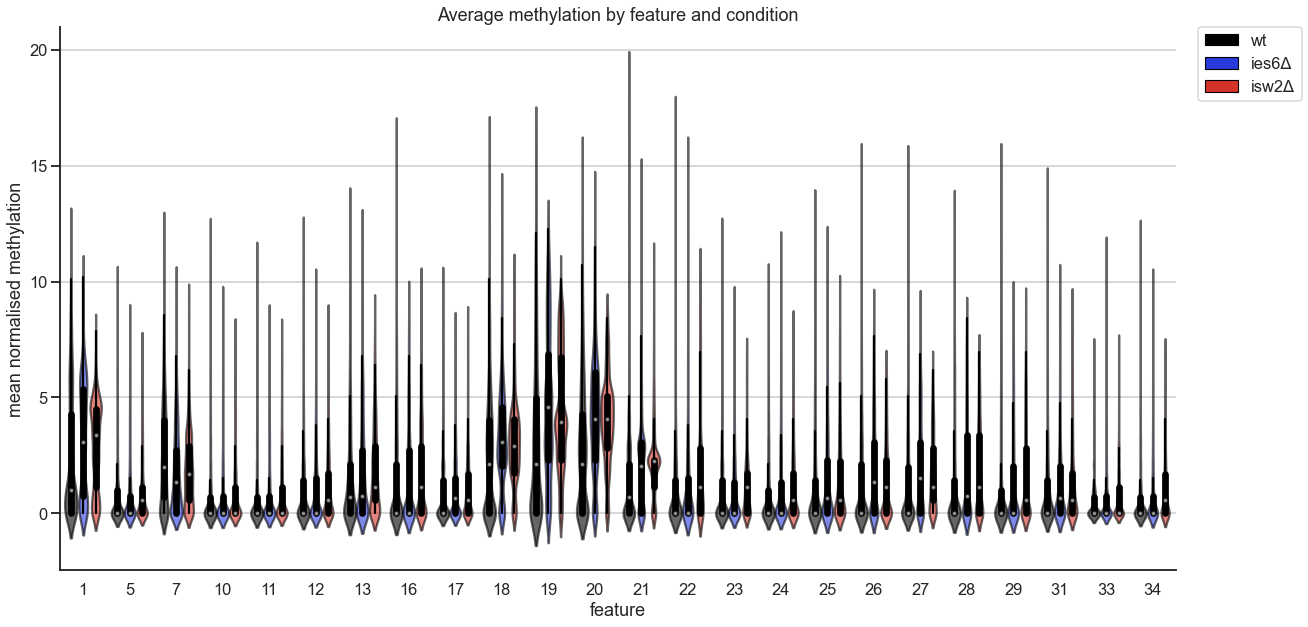

In [82]:
col_Anna = ["black", "#0a22fa", "#f2180c"]

with sns.axes_style("ticks", {'axes.grid': True, 'axes.spines.right': False, 'axes.spines.top': False,
                                 'xtick.bottom': False}):
    sns.set_context("talk")
    plt.figure(figsize = (20, 10))#(10,7))
    ax = sns.violinplot(data = methylation_rep1, x="feature", y = "norm methylation", hue = "condition", 
                    palette = col_Anna)
    plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
    plt.setp(ax.collections, alpha = 0.6)
    plt.title("Average methylation by feature and condition")
    plt.ylabel("mean normalised methylation")
    #plt.savefig(load_dir + "/plots/ARS305_pooled_norm_av_methylation_by_feature_window30_union_revision.svg", 
     #           dpi = 300, bbox_inches = "tight")
    plt.show()

In [83]:
#methylation_rep1.to_csv(load_dir + "/ARS305_violinplots_annotation_v3.csv")

In [84]:
#Combine the violinplots into one plot per replicate:
#for each feature, plot wt and mutants next to each other

#transfer array to dataframe, melt that into the long form and assign a catergory "condition"
feat_me_wt_rep3 = pd.DataFrame(wt_rep3_feat_me, columns = ARS305_anno.index)
feat_me_wt_rep3["molecule"] = feat_me_wt_rep3.index
feat_me_wt_rep3["strand"] = ["plus" if i<feat_me_wt_rep3.shape[0]//2 else "minus" for i in range(feat_me_wt_rep3.shape[0])]
feat_me_wt_rep3_melt = pd.melt(feat_me_wt_rep3, id_vars=(["molecule", "strand"]), var_name = ("feature"))
feat_me_wt_rep3_melt["condition"] = "wt"
feat_me_wt_rep3_melt["replicate"] = "wt rep3"

feat_me_wt_rep2 = pd.DataFrame(wt_rep2_feat_me, columns = ARS305_anno.index)
feat_me_wt_rep2["molecule"] = feat_me_wt_rep2.index
feat_me_wt_rep2["strand"] = ["plus" if i<feat_me_wt_rep2.shape[0]//2 else "minus" for i in range(feat_me_wt_rep2.shape[0])]
feat_me_wt_rep2_melt = pd.melt(feat_me_wt_rep2, id_vars=(["molecule", "strand"]), var_name = ("feature"))
feat_me_wt_rep2_melt["condition"] = "wt"
feat_me_wt_rep2_melt["replicate"] = "wt rep2"

#the same for dies6
feat_me_dies6_rep2 = pd.DataFrame(dies6_rep2_feat_me, columns = ARS305_anno.index)
feat_me_dies6_rep2["molecule"] = feat_me_dies6_rep2.index
feat_me_dies6_rep2["strand"] = ["plus" if i<feat_me_dies6_rep2.shape[0]//2 else "minus" for i in range(feat_me_dies6_rep2.shape[0])]
feat_me_dies6_rep2_melt = pd.melt(feat_me_dies6_rep2, id_vars=(["molecule", "strand"]), var_name = ("feature"))
feat_me_dies6_rep2_melt["condition"] = "dies6"
feat_me_dies6_rep2_melt["replicate"] = "dies6 rep2"

feat_me_dies6_rep1 = pd.DataFrame(dies6_rep1_feat_me, columns = ARS305_anno.index)
feat_me_dies6_rep1["molecule"] = feat_me_dies6_rep1.index
feat_me_dies6_rep1["strand"] = ["plus" if i<feat_me_dies6_rep1.shape[0]//2 else "minus" for i in range(feat_me_dies6_rep1.shape[0])]
feat_me_dies6_rep1_melt = pd.melt(feat_me_dies6_rep1, id_vars=(["molecule", "strand"]), var_name = ("feature"))
feat_me_dies6_rep1_melt["condition"] = "dies6"
feat_me_dies6_rep1_melt["replicate"] = "dies6 rep1"


#the same for disw2
feat_me_disw2_rep2 = pd.DataFrame(disw2_rep2_feat_me, columns = ARS305_anno.index)
feat_me_disw2_rep2["molecule"] = feat_me_disw2_rep2.index
feat_me_disw2_rep2["strand"] = ["plus" if i<feat_me_disw2_rep2.shape[0]//2 else "minus" for i in range(feat_me_disw2_rep2.shape[0])]
feat_me_disw2_rep2_melt = pd.melt(feat_me_disw2_rep2, id_vars=(["molecule", "strand"]), var_name = ("feature"))
feat_me_disw2_rep2_melt["condition"] = "disw2"
feat_me_disw2_rep2_melt["replicate"] = "disw2 rep2"

feat_me_disw2_rep1 = pd.DataFrame(disw2_rep1_feat_me, columns = ARS305_anno.index)
feat_me_disw2_rep1["molecule"] = feat_me_disw2_rep1.index
feat_me_disw2_rep1["strand"] = ["plus" if i<feat_me_disw2_rep1.shape[0]//2 else "minus" for i in range(feat_me_disw2_rep1.shape[0])]
feat_me_disw2_rep1_melt = pd.melt(feat_me_disw2_rep1, id_vars=(["molecule", "strand"]), var_name = ("feature"))
feat_me_disw2_rep1_melt["condition"] = "disw2"
feat_me_disw2_rep1_melt["replicate"] = "disw2 rep1"

#merge into one dataframe:
methylation_features = pd.concat([feat_me_wt_rep3_melt, feat_me_wt_rep2_melt, 
                                  feat_me_dies6_rep1_melt, feat_me_dies6_rep2_melt,
                                  feat_me_disw2_rep1_melt, feat_me_disw2_rep2_melt
                                 ])
methylation_features.rename(columns = {"value" : "norm_methylation"}, inplace=True)

In [85]:
#methylation_features.to_csv(load_dir + "/ARS305_feature_methylation_window_30_union_selected.csv")

In [86]:
from scipy.stats import mannwhitneyu

#Calculate p-values for the distributions in the violins using the mann-whitney U test

feature_pvalues = ARS305_anno.drop(columns = "position")
feature_pvalues["dies6_rep2"] = [mannwhitneyu(feat_me_wt_pool.loc[:, column],
                                        feat_me_dies6_rep2.loc[:, column], 
                                        alternative = "two-sided").pvalue for column in feat_me_wt_rep3.columns if not ((column == "molecule")|(column == "strand"))]
feature_pvalues["disw2_rep1"] = [mannwhitneyu(feat_me_wt_pool.loc[:, column],
                                        feat_me_disw2_rep1.loc[:, column], 
                                        alternative = "two-sided").pvalue for column in feat_me_wt_rep3.columns if not ((column == "molecule")|(column == "strand"))]

feature_pvalues

,pos_start,pos_stop,length,dies6_rep2,disw2_rep1
1,0,29,30,8.875247e-36,1.843578e-15
5,120,149,30,9.691485e-04,2.682625e-10
7,180,209,30,1.103803e-12,1.658551e-09
10,270,299,30,7.369917e-01,3.256820e-22
11,300,329,30,8.616190e-02,1.739147e-27
12,330,359,30,3.905694e-05,6.160221e-29
13,360,389,30,1.216669e-03,2.372496e-13
16,450,479,30,5.611812e-04,2.401162e-23
17,480,509,30,1.694916e-10,2.181287e-22
18,510,539,30,6.744144e-52,6.001168e-29


In [87]:
feature_pvalues[feature_pvalues.dies6_rep2 < 2.5e-2]

,pos_start,pos_stop,length,dies6_rep2,disw2_rep1
1,0,29,30,8.875247e-36,1.843578e-15
5,120,149,30,9.691485e-04,2.682625e-10
7,180,209,30,1.103803e-12,1.658551e-09
12,330,359,30,3.905694e-05,6.160221e-29
13,360,389,30,1.216669e-03,2.372496e-13
16,450,479,30,5.611812e-04,2.401162e-23
17,480,509,30,1.694916e-10,2.181287e-22
18,510,539,30,6.744144e-52,6.001168e-29
19,540,569,30,8.897225e-81,1.620710e-58
20,570,599,30,7.679380e-90,4.748926e-63


In [88]:
feature_pvalues[feature_pvalues.disw2_rep1 < 2.5e-2]

,pos_start,pos_stop,length,dies6_rep2,disw2_rep1
1,0,29,30,8.875247e-36,1.843578e-15
5,120,149,30,9.691485e-04,2.682625e-10
7,180,209,30,1.103803e-12,1.658551e-09
10,270,299,30,7.369917e-01,3.256820e-22
11,300,329,30,8.616190e-02,1.739147e-27
12,330,359,30,3.905694e-05,6.160221e-29
13,360,389,30,1.216669e-03,2.372496e-13
16,450,479,30,5.611812e-04,2.401162e-23
17,480,509,30,1.694916e-10,2.181287e-22
18,510,539,30,6.744144e-52,6.001168e-29


In [89]:
#Calculate p-values for the distributions in the violins using the mann-whitney U test

feature_pvalues = ARS305_anno.drop(columns = "position")
feature_pvalues["dies6_pool"] = [mannwhitneyu(feat_me_wt_pool.loc[:, column],
                                        feat_me_dies6_pool.loc[:, column], 
                                        alternative = "two-sided").pvalue for column in feat_me_wt_rep3.columns if not ((column == "molecule")|(column == "strand"))]
feature_pvalues["disw2_pool"] = [mannwhitneyu(feat_me_wt_pool.loc[:, column],
                                        feat_me_disw2_pool.loc[:, column], 
                                        alternative = "two-sided").pvalue for column in feat_me_wt_rep3.columns if not ((column == "molecule")|(column == "strand"))]

feature_pvalues

,pos_start,pos_stop,length,dies6_pool,disw2_pool
1,0,29,30,6.957580e-29,4.192312e-23
5,120,149,30,1.697952e-04,1.060716e-28
7,180,209,30,1.642371e-29,1.451180e-14
10,270,299,30,1.984030e-02,5.113345e-27
11,300,329,30,2.067548e-05,4.186347e-32
12,330,359,30,4.234369e-09,5.060418e-39
13,360,389,30,3.414501e-05,2.131200e-25
16,450,479,30,6.666550e-08,9.273833e-41
17,480,509,30,8.567319e-11,2.267118e-33
18,510,539,30,4.628651e-55,3.034777e-51


In [90]:
feature_pvalues[feature_pvalues.dies6_pool < 2.5e-2]

,pos_start,pos_stop,length,dies6_pool,disw2_pool
1,0,29,30,6.957580e-29,4.192312e-23
5,120,149,30,1.697952e-04,1.060716e-28
7,180,209,30,1.642371e-29,1.451180e-14
10,270,299,30,1.984030e-02,5.113345e-27
11,300,329,30,2.067548e-05,4.186347e-32
12,330,359,30,4.234369e-09,5.060418e-39
13,360,389,30,3.414501e-05,2.131200e-25
16,450,479,30,6.666550e-08,9.273833e-41
17,480,509,30,8.567319e-11,2.267118e-33
18,510,539,30,4.628651e-55,3.034777e-51


In [91]:
feature_pvalues[feature_pvalues.disw2_pool < 2.5e-2]

,pos_start,pos_stop,length,dies6_pool,disw2_pool
1,0,29,30,6.957580e-29,4.192312e-23
5,120,149,30,1.697952e-04,1.060716e-28
7,180,209,30,1.642371e-29,1.451180e-14
10,270,299,30,1.984030e-02,5.113345e-27
11,300,329,30,2.067548e-05,4.186347e-32
12,330,359,30,4.234369e-09,5.060418e-39
13,360,389,30,3.414501e-05,2.131200e-25
16,450,479,30,6.666550e-08,9.273833e-41
17,480,509,30,8.567319e-11,2.267118e-33
18,510,539,30,4.628651e-55,3.034777e-51


In [92]:
feature_pvalues.index

Int64Index([ 1,  5,  7, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
            26, 27, 28, 29, 31, 33, 34],
           dtype='int64')

In [93]:
#feature_pvalues.to_csv(load_dir + "/ARS305_p_values_avg_feature_methylation.csv")

## Use peak detection to estimate the size of the nucleosome-free region

In [94]:
sns.set_context("paper")

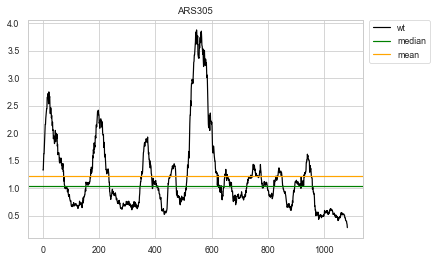

In [95]:

N=30
pooled_wt_smoothed = np.convolve(pooled_wt, np.ones(N)/N, mode="same")

sns.lineplot(x = range(pooled_wt_smoothed.shape[0]),
             y = pooled_wt_smoothed, color = "black", label = "wt")
plt.axhline(np.median(pooled_wt_smoothed,axis=0), color ="green", label = "median")
plt.axhline(np.mean(pooled_wt_smoothed,axis=0), color ="orange", label = "mean")
plt.title(load_dir)
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0,
          labels = ["wt", "median", "mean"])

In [96]:
significant[(significant["pos_start"]>480)&(significant["pos_start"]<620)]

,pos_start,pos_stop,length,p_value_dies6,p_value_disw2
18,510,539,30,0.000127,0.000233
19,540,569,30,0.000046,0.000046
20,570,599,30,0.000127,0.000295
21,600,629,30,0.000051,0.000018


In [97]:
from scipy import signal

x = pooled_wt_smoothed[480:700]
peaks, properties = signal.find_peaks(x, width=20, 
                               #rel_height=0.9,
                               #prominence = (None, 0.8), 
                               #height= np.mean(x)
                              )
properties

{'prominences': array([3.17905775]),
 'left_bases': array([8]),
 'right_bases': array([205]),
 'widths': array([64.68500373]),
 'width_heights': array([2.2895695]),
 'left_ips': array([42.74523988]),
 'right_ips': array([107.43024361])}

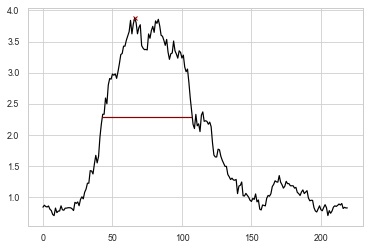

In [98]:
plt.plot(x, color = "black")
plt.plot(peaks, x[peaks], "x", color = "darkred")
plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"],
            xmax=properties["right_ips"], color = "darkred")

#plt.text(x = properties["left_ips"],y=properties["width_heights"], s = ("width: " + str(int(properties["widths"]))),
#         fontsize = 13, color="darkred")
plt.show()

In [99]:
signal.peak_widths(x, peaks, rel_height = 0.9)[0]

array([114.78016229])

Text(0.5, 1.0, 'Measure peak width at 90% rel height, ARS305')

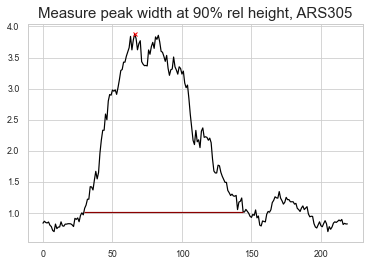

In [100]:
plt.plot(x, color = "black")
plt.plot(peaks, x[peaks], "x", color = "red")
plt.hlines(*signal.peak_widths(x, peaks, rel_height = 0.9)[1:], color ="darkred")
plt.title( "Measure peak width at 90% rel height, ARS305", fontsize = 15)

In [101]:
pooled_dies6_smoothed = np.convolve(pooled_dies6, np.ones(N)/N, mode = "same")[480:700]
pooled_disw2_smoothed = np.convolve(pooled_disw2, np.ones(N)/N, mode = "same")[480:700]

Text(0.5, 1.0, 'Measure peak width at 90% rel height, ARS305')

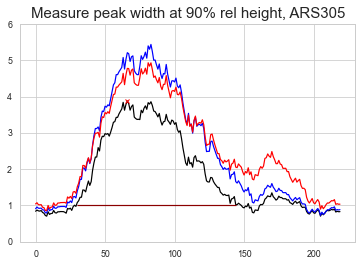

In [102]:
plt.plot(x, color = "black")
plt.plot(pooled_dies6_smoothed, color = "blue")
plt.plot(pooled_disw2_smoothed, color = "red")

plt.plot(peaks, x[peaks], "x", color = "red")
plt.hlines(*signal.peak_widths(x, peaks, rel_height = 0.9)[1:], color ="darkred")
plt.ylim(0, 6)
plt.title( "Measure peak width at 90% rel height, ARS305", fontsize = 15)

### Define the width of the nucleosome-free region as P10 - the peak width at 10% of peak height, from the wild type sample. This represents the cutoff for this origin for "nucleosome free"

In [103]:
width = signal.peak_widths(x, peaks, rel_height = 0.9)

In [104]:
peak_indices_dies6 = np.where(pooled_dies6_smoothed > width[1])[0]
width_dies6 = peak_indices_dies6[-1] - peak_indices_dies6[0]
print("peak width for dies6: ", width_dies6)

peak width for dies6:  171


In [105]:
#print(pooled_disw2_smoothed > width[1])
peak_indices_disw2 = np.where(pooled_disw2_smoothed > width[1])[0]
#width_disw2 = peak_indices_disw2[-1] - peak_indices_disw2[0]
width_disw2 = 204 - 16 #just measure the length of the largest stretch of Trues from the first line of this cell
print("peak width for disw2: ", width_disw2)

peak width for disw2:  188


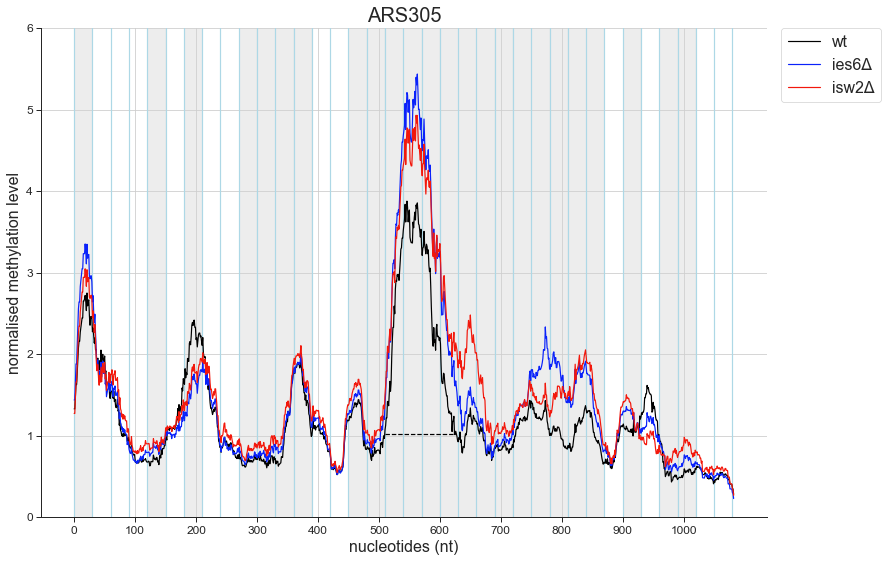

In [106]:
sns.set_context("paper")
#sns.set(style = "whitegrid", font_scale=1.5)
with sns.axes_style("ticks", {'axes.grid': True, 'axes.spines.right': False, 'axes.spines.top': False}):

        plt.figure(figsize = (13, 9))
        for left_border in saved.loc[:, "pos_start"]:
            plt.axvline(left_border, color = "lightblue")
        for feature in significant.index:
            plt.fill_betweenx(range(0,7), 
                      significant.loc[feature, "pos_start"],
                      significant.loc[feature, "pos_stop"], 
                      color = "lightgray", alpha = 0.4)
        sns.lineplot(x = range(wt_rep3_minmax.shape[0]),
             y = np.convolve(pooled_wt, np.ones(N)/N, mode="same"),
             color = "black", 
            label = "wt")
        sns.lineplot(x = range(wt_rep3_minmax.shape[0]),
             y = np.convolve(pooled_dies6, np.ones(N)/N, mode="same"), 
             color = "#0a22fa",# alpha = 0.7,
            label = "ies6Δ")
        sns.lineplot(x = range(wt_rep3_minmax.shape[0]),
            y = np.convolve(pooled_disw2, np.ones(N)/N, mode = "same"), 
            color = "#f2180c",# alpha = 0.7,
            label = "isw2Δ")
        plt.title(load_dir , fontsize=20
          #+  ", mean normalised and pooled, smoothened with " + str(N)
                  )
        plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0, fontsize = 16)
        plt.ylim(0, 6)
        plt.xticks(range(0, wt_rep3_minmax.shape[0], 100), fontsize = 12)
        plt.yticks(fontsize = 12)
        plt.xlabel("nucleotides (nt)", fontsize = 16)
        plt.ylabel("normalised methylation level", fontsize = 16)
        
        plt.hlines(y=width[1], # properties["width_heights"],
                   xmin = width[2]+480,
                   xmax = width[3]+480, 
                   color = "black", linestyles = "dashed")
        
        #plt.savefig(load_dir + "/plots/ARS305_smoothed_profiles_revision_window30_union_selection_peak_width.svg", dpi=300, bbox_inches = "tight")
        plt.show()

## Find valleys in normalised single-molecule data around the origin as footprints of Mcm double hexamers

In [107]:
# https://openwritings.net/pg/python/python-find-peaks-and-valleys-chart-using-scipysignalargrelextrema

In [108]:
#To smoothen the signal in a sliding window across columns, either use pandas rolling in combination with mean, or 
# numpys convolve while applying it along an axis

# df.rolling(30, center=True, axis = 1, closed="both").mean()

smooth_window =30
def smooth(array):
        return np.convolve(array, np.ones(smooth_window)/smooth_window, mode = "same")

In [109]:
# Concatenate normalised data from replicates 
wt_norm = np.concatenate((wt_rep3_maxnorm, wt_rep2_maxnorm), axis = 0)
dies6_norm = np.concatenate((dies6_rep1_maxnorm, dies6_rep2_maxnorm), axis =0)
disw2_norm = np.concatenate((disw2_rep1_maxnorm, disw2_rep2_maxnorm), axis =0)

In [110]:
wt_smooth = np.apply_along_axis(smooth, 1, wt_norm)
dies6_smooth = np.apply_along_axis(smooth, 1, dies6_norm)
disw2_smooth = np.apply_along_axis(smooth, 1, disw2_norm)

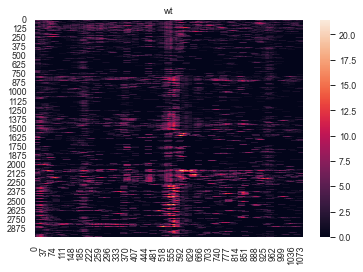

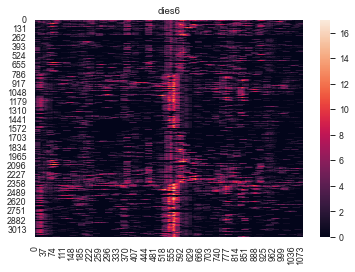

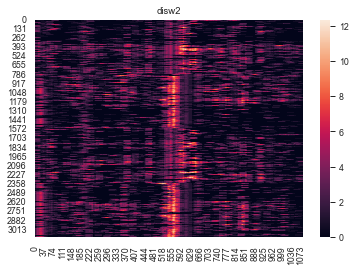

In [111]:
sns.heatmap(wt_smooth)
plt.title("wt")
plt.show()
sns.heatmap(dies6_smooth)
plt.title("dies6")
plt.show()
sns.heatmap(disw2_smooth)
plt.title("disw2")
plt.show()

In [112]:
def measure_valleys(array2D, width_range:tuple = (50,70)):
    #define dataframe to store peak information in 
    peak_sums = pd.DataFrame({"left_bases" : None,
                            "widths" : None} , 
                            index = range(array2D.shape[0]))
    
    for index, row in enumerate(array2D):
        _, peak_array = signal.find_peaks(-row, width= width_range) # only store peaks between 45 and 70 bases
        peak_sums.loc[index, "left_bases"] = list(peak_array["left_bases"])
        peak_sums.loc[index, "widths"] = list(peak_array["widths"])
    return peak_sums

In [113]:
def restore_valleys(peak_summary_df, output_shape:tuple):
    # define array of zeros in output shape, et regions of peaks to one
    zeros_array = np.zeros(output_shape)
    # loop over peak summary dataframe
    for row_num in range(peak_summary_df.shape[0]):
        #check if there are detected peaks for this molecule
        if peak_summary_df.loc[row_num, "widths"]:
            left_pos = peak_summary_df.loc[row_num, "left_bases"]
            widths = peak_summary_df.loc[row_num, "widths"]
            for ind, _ in enumerate(left_pos):
                zeros_array[row_num, left_pos[ind]: (left_pos[ind] + int(widths[ind]))] = 1
                #set stretches for peak width to 1
    return zeros_array

In [114]:
width_range = (50,60)
peaks_wt = measure_valleys(wt_norm, width_range = width_range) #[:, 340:640]
rebuild_wt = restore_valleys(peaks_wt, wt_norm.shape) #[:, 340:640]

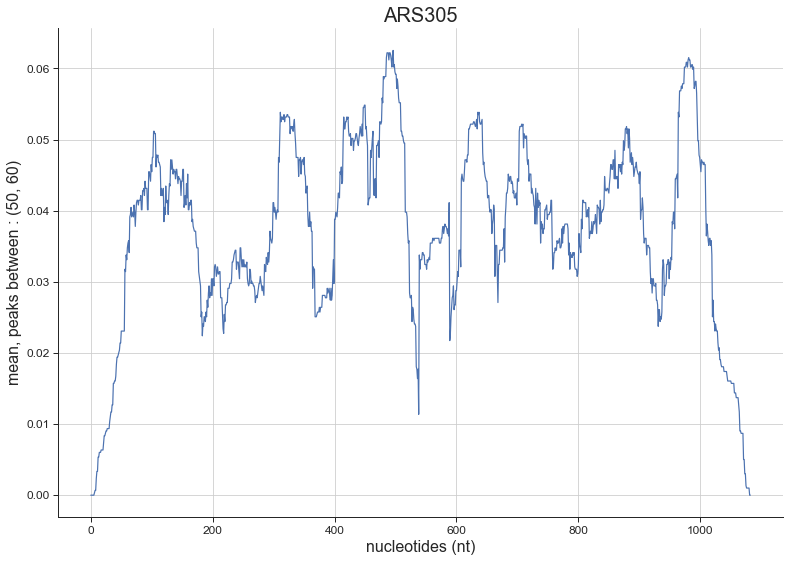

In [115]:
sns.set_context("paper")
with sns.axes_style("ticks", {'axes.grid': True, 'axes.spines.right': False, 'axes.spines.top': False}):

        plt.figure(figsize = (13, 9))
        plt.xticks(fontsize = 12)
        plt.yticks(fontsize = 12)
        plt.title(load_dir , fontsize=20
          #+  ", mean normalised and pooled, smoothened with " + str(N)
                  )
        plt.xlabel("nucleotides (nt)", fontsize=16)
        plt.ylabel("mean, peaks between : " + str(width_range), fontsize = 16)
        plt.plot(rebuild_wt.mean(axis=0))
        plt.show()

In [116]:
peaks_dies6 = measure_valleys(dies6_norm, width_range = width_range) #[:, 340:640]
rebuild_dies6 = restore_valleys(peaks_dies6, dies6_norm.shape) #[:, 340:640]

peaks_disw2 = measure_valleys(disw2_norm, width_range = width_range) #[:, 340:640]
rebuild_disw2 = restore_valleys(peaks_disw2, disw2_norm.shape) #[:, 340:640]

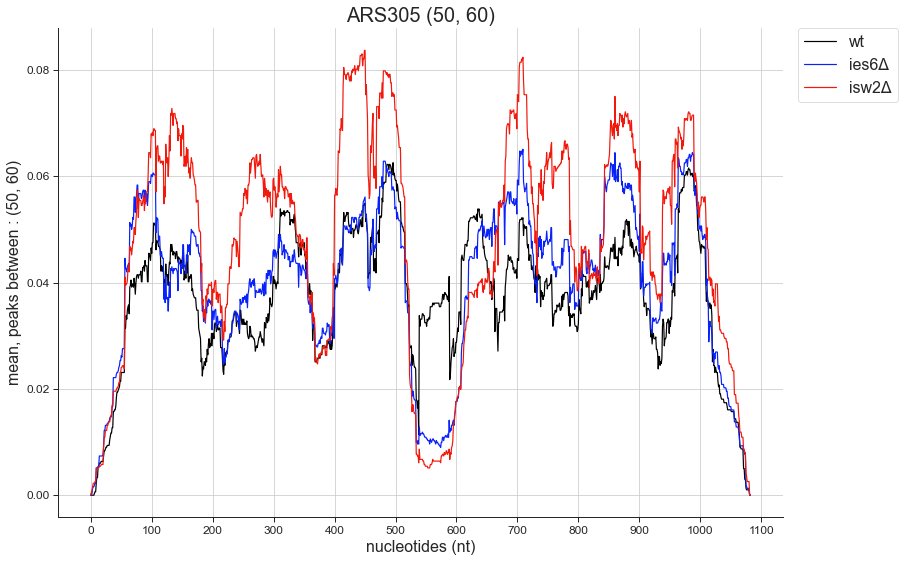

In [117]:
sns.set_context("paper")
#sns.set(style = "whitegrid", font_scale=1.5)
with sns.axes_style("ticks", {'axes.grid': True, 'axes.spines.right': False, 'axes.spines.top': False}):

        plt.figure(figsize = (13, 9))
        sns.lineplot(#x = range(340,640),
            x = range(wt_norm.shape[1]),
             y = rebuild_wt.mean(axis=0),
             color = "black", 
            label = "wt")
        sns.lineplot(#x = range(340,640),
            x = range(wt_norm.shape[1]),
             y = rebuild_dies6.mean(axis=0), 
             color = "#0a22fa",# alpha = 0.7,
            label = "ies6Δ")
        sns.lineplot(#x = range(340,640),
            x = range(wt_norm.shape[1]),
            y = rebuild_disw2.mean(axis=0), 
            color = "#f2180c",# alpha = 0.7,
            label = "isw2Δ")
        plt.xticks(range(0, 1200, 100), fontsize = 12)
        plt.yticks(fontsize = 12)
        plt.title(load_dir +" " + str(width_range), fontsize=20
          #+  ", mean normalised and pooled, smoothened with " + str(N)
                  )
        plt.xlabel("nucleotides (nt)", fontsize=16)
        plt.ylabel("mean, peaks between : " + str(width_range), fontsize = 16)
        plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0, fontsize = 16)
        
        plt.savefig(load_dir + "/plots/ARS305_distribution_peaks_50_60.pdf", dpi=300, bbox_inches = "tight")
        plt.show()

In [118]:
# edit 2023/09/08: try incorporate cluster information
cluster_info_df = pd.read_csv("ARS305/ARS305_postive_strands_feature_meth_window30_clusters.csv")

# check the number of molecules per strand

#nrows = 0
#for replicate in [wt_rep3_maxnorm, wt_rep2_maxnorm, dies6_rep1_maxnorm, 
#             dies6_rep2_maxnorm, disw2_rep1_maxnorm, disw2_rep2_maxnorm]:
#    nrows += replicate.shape[0]
#print(int(nrows/2))

#construct a df with binary matrices for all replicates and replicate annotation

all_data= pd.DataFrame()

for (array, name) in zip([wt_rep3_maxnorm, wt_rep2_maxnorm, 
                                  dies6_rep1_maxnorm, dies6_rep2_maxnorm,
                                  disw2_rep1_maxnorm, disw2_rep2_maxnorm],
                ["wt rep3", "wt rep2", "dies6 rep1", "dies6 rep2", "disw2 rep1", "disw2 rep2"]):
    inter = pd.DataFrame(array)
    inter["molecule"] = inter.index
    inter["replicate"] = name
    inter["strand"] = ["plus" if i<inter.shape[0]//2 else "minus" for i in range(inter.shape[0])]
    all_data = pd.concat([all_data, inter], axis = 0)

all_data_plus = all_data.loc[all_data.strand == "plus"].merge(cluster_info_df.loc[:, ["replicate", "molecule", "cluster"]], 
                on = ["replicate", "molecule"], how = "inner")
all_data_plus.head()

,0,1,2,3,4,5,6,7,8,9,...,1077,1078,1079,1080,1081,1082,molecule,replicate,strand,cluster
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,20.711223,0.0,0.0,0.0,0.0,0.0,0,wt rep3,plus,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,20.711223,0.0,0.0,0.0,0.0,0.0,1,wt rep3,plus,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.711223,...,0.000000,0.0,0.0,0.0,0.0,0.0,2,wt rep3,plus,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,3,wt rep3,plus,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,4,wt rep3,plus,3


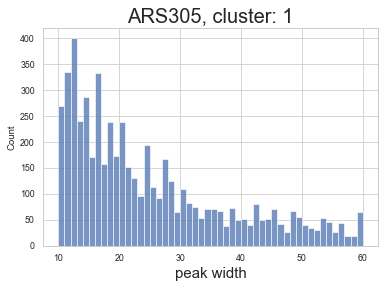

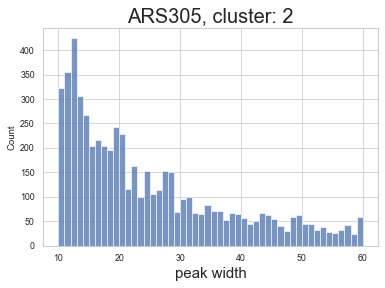

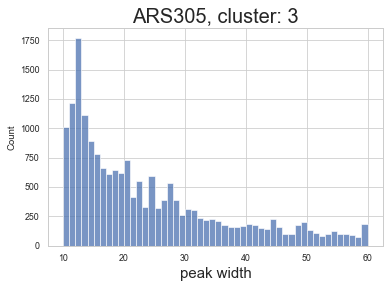

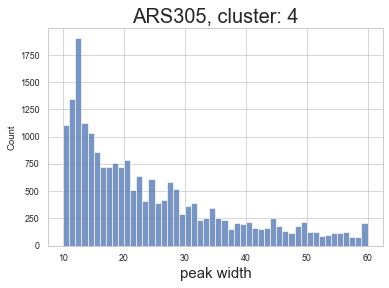

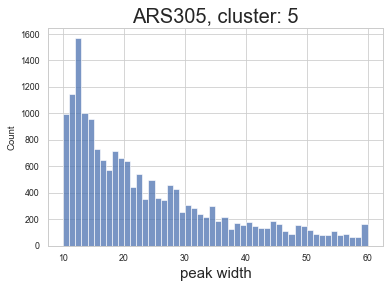

In [124]:
width_range = (10, 60)

for cluster in set(all_data_plus.cluster):
    
    data_temp = np.array(all_data_plus.loc[all_data_plus.cluster == cluster, :1082])
    
    peaks_temp = measure_valleys(data_temp, width_range = width_range)
    rebuild_temp = restore_valleys(peaks_temp, data_temp.shape)

    listofpeakwidths = []

    for row in peaks_temp.widths:
        listofpeakwidths = listofpeakwidths + row
    
    sns.histplot(listofpeakwidths, binwidth=1)
    plt.title(load_dir + ", cluster: " + str(cluster) , fontsize=20)
    plt.xlabel("peak width", fontsize=15)
    plt.show()

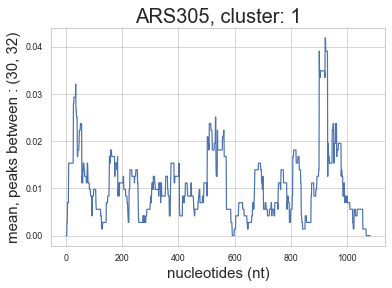

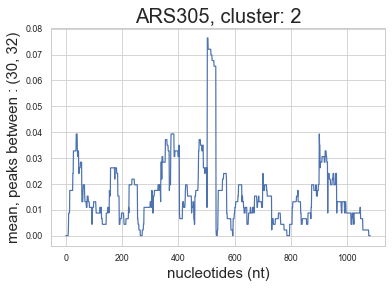

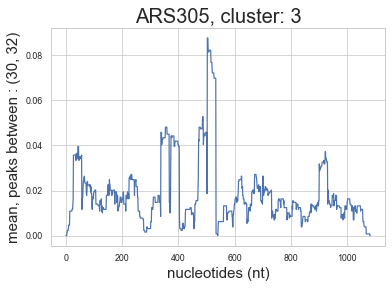

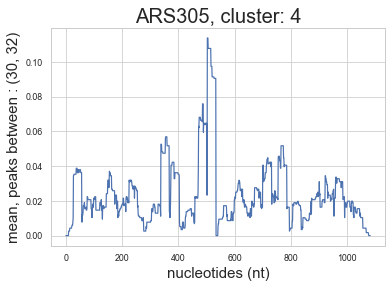

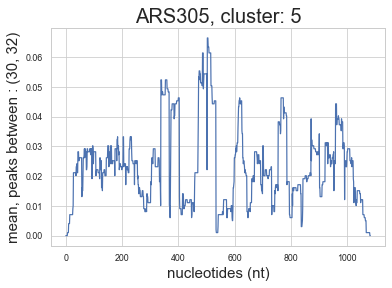

In [139]:
width_range = (30,32)

for cluster in set(all_data_plus.cluster):
    
    data_temp = np.array(all_data_plus.loc[all_data_plus.cluster == cluster, :1082])
    
    peaks_temp = measure_valleys(data_temp, width_range = width_range)
    rebuild_temp = restore_valleys(peaks_temp, data_temp.shape)
    
    plt.plot(rebuild_temp.mean(axis=0))
    plt.title(load_dir + ", cluster: " + str(cluster) , fontsize=20)
    plt.xlabel("nucleotides (nt)", fontsize=15)
    plt.ylabel("mean, peaks between : " + str(width_range), fontsize = 15)
    plt.show()
        

In [120]:
all_data_plus.cluster.value_counts()

3    1289
4    1159
5     992
1     717
2     458
Name: cluster, dtype: int64

Text(0.5, 1.0, 'Number of peaks per molecule between 400-600 nt')

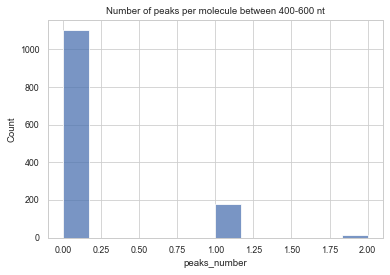

In [150]:
# In the area between 400 and 600 bases, do molecules show a double peak with peak size between 30 and 31 nt?
cluster3_peaks = measure_valleys(np.array(all_data_plus.loc[all_data_plus.cluster == 3, 400:600]),
                                 width_range = (30,32))

cluster3_peaks["peaks_number"] = pd.Series([len(row) for row in cluster3_peaks.widths])
sns.histplot(cluster3_peaks, x = "peaks_number")
plt.title("Number of peaks per molecule between 400-600 nt")

<AxesSubplot:xlabel='peaks_number', ylabel='Count'>

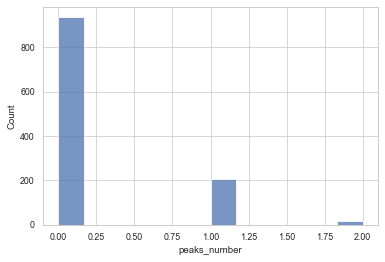

In [152]:
# In the area between 400 and 600 bases, do molecules show a double peak?
cluster4_peaks = measure_valleys(np.array(all_data_plus.loc[all_data_plus.cluster == 4, 400:600]),
                                 width_range = (30,32))

cluster4_peaks["peaks_number"] = pd.Series([len(row) for row in cluster4_peaks.widths])
sns.histplot(cluster4_peaks, x = "peaks_number")

## Plot the per base efficiency for the whole ARS305 origin:

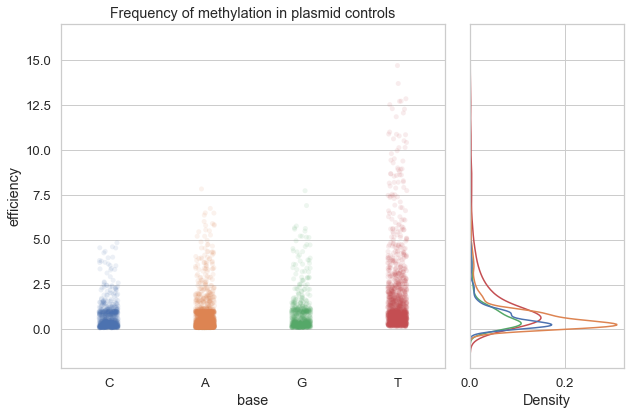

In [107]:
#prepare the data:
seq = "atgaaagaatacgttattctttcatcaaatcgtggtcgaccggcatgcaagctccctcgagAAATACAGAATAGGAAAGTAAAAGGCAATATATGAATGCAGTGCTTGTAACTGGTGCTTGTATCCAAGAATAGCTTCTTGCTGTAGGTTATGGGAATATCGTGTAAGCTGGGGTGACTTTTGAGCTATTCGCGACGCCCGACGCCGTAATAACTACTTTCGACAGACCACTTATGACAGTATTTCAGGCCGCTCTTATAAAATGACATGTTAACAAACAGTTCTGATTATTCGCCTTTTGACAGGACGATAATGTAAATAGTTGTGGTAGTATCATTCAGGTATGTAACTGTTTACTTTGTATCGCTTGAAAAAAATAAGCATTTCAGAGCCTTCTTTGGAGCTCAAGTGGATTGAGGCCACAGCAAGACCGGCCAGTTTGAATGCTCAACTCTTCAAAAGAAATTCCTCAAATATGTCCAGTTTCATGTACTGTCCGGTGTGATTTATTATTTTTTATTTACTTTGTAGTTCTTAAAGCTAAGATTTTTTTCTTTGATAAATTCTTGTTTTCATATCCTAAAATTAAAGGGAAAATAAACAATACATAACAAAACATATAAAAACCAACACAATAAAAAAAAGGATCAAATACTCATTAAAGTAACTTACACGGGGGCTAAAAACGGAGTTTGATGAATATTCACAAGATAAAAATCATATGTATGTTTCTGATATATCGATATACAATCAAACACTTTCAAGAATTTGTTTGTAGACTTTTTGCTAGAGACCTCATCAAAGTGCTACCAACTAAGATCAACTTATACTTCTTTTAGAGAAAATTTTTTTCAATGTACTCCAAAGAGATTTAGATCCTGTCTCTTCCTCTTCCTCTTCCTCGAAAGTCAAAGAAAAATCAGAGTCTCCCTGCTTATTCAGGCGGAGAGGCTCTAGGGTAGTTGCGTTTCTCTCATTGGGACACTGAACCTCATTTTCCAACATTTTGGTCATGTAAGAGGCGACAGGCTCATCGCAGGTGGGTGCATCAACATGGTAGTACCTGGACCAAGCGCTACATTG"
#sequence of overlap of origin and plasmid:
seq= seq[223:933]

#eff_df = pd.DataFrame({"wt_rep3": wt_rep3_minmax}, index=range(1083)) #wt_rep3_minmax #ARS305_wt.mean(axis=0)
eff_df = pd.DataFrame({"wt_rep3": ARS305_wt3_norm}, index=range(710)) 

eff_df["base"] = [letter for letter in seq]

"""
eff_df["wt_rep2"] = ARS305_wt_rep2.mean(axis=0)
eff_df["dies6_rep1"] = ARS305_dies6_rep1.mean(axis=0)
eff_df["dies6_rep2"] = ARS305_dies6_rep2.mean(axis=0)
eff_df["disw2_rep1"] = ARS305_disw2_rep1.mean(axis=0)
eff_df["disw2_rep2"] = ARS305_disw2_rep2.mean(axis=0)

""" """
eff_df["wt_rep2"] = wt_rep2_minmax
eff_df["dies6_rep1"] = dies6_rep1_minmax
eff_df["dies6_rep2"] = dies6_rep2_minmax
eff_df["disw2_rep1"] = disw2_rep1_minmax
eff_df["disw2_rep2"] = disw2_rep2_minmax
"""

eff_df["wt_rep2"] = ARS305_wt2_norm
eff_df["dies6_rep1"] = ARS305_dies61_norm
eff_df["dies6_rep2"] = ARS305_dies62_norm
eff_df["disw2_rep1"] = ARS305_disw21_norm
eff_df["disw2_rep2"] = ARS305_disw22_norm

eff_df_melt = eff_df.melt(id_vars="base", var_name= "sample", value_name="efficiency")

# specify plot layouts with different width using subplots()
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

f, axs = plt.subplots(1,2,
                      figsize=(9,6),
                      sharey=True,
                     gridspec_kw=dict(width_ratios=[2.5,1]))
# make scatterplot with legends
sns.stripplot(data = eff_df_melt, x = "base", y = "efficiency", alpha=0.1, ax= axs[0])
axs[0].set_title("Frequency of methylation in plasmid controls")
axs
# make densityplot with kdeplot without legends
sns.kdeplot(data= eff_df_melt,
                y="efficiency",
                hue="base",
                ax=axs[1],
                legend=False, warn_singular=False)
f.tight_layout()
#plt.savefig(load_dir + "/plots/methylation_efficiency_naked_plasmid.tif", dpi=300)

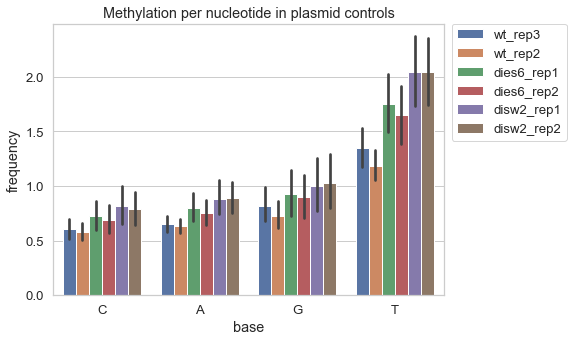

In [108]:
plt.figure(figsize=(7,5))
sns.barplot(data=eff_df_melt, x = "base", y = "efficiency", hue = "sample")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
plt.title("Methylation per nucleotide in plasmid controls")
plt.ylabel("frequency")
#plt.savefig(load_dir + "/plots/methylation_efficiency_naked_plasmid_per_sample.tif", dpi=300, bbox_inches='tight')
plt.show()

<AxesSubplot:title={'center':'Normalized methylation over samples'}, xlabel='sample', ylabel='normalized frequency of methylation'>

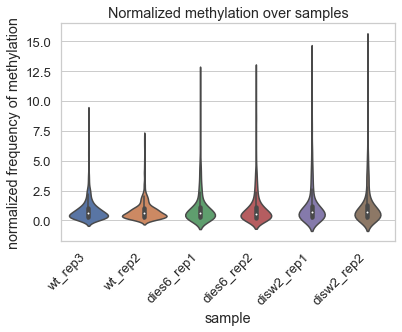

In [109]:
g = sns.violinplot(data = eff_df_melt, x = "sample", y = "efficiency", alpha=0.1)
g.set_ylabel("normalized frequency of methylation")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title("Normalized methylation over samples")

g

In [81]:
#Exporting aggregated data for Anna to plot for the manuscript 
#31th May 2022

smooth = {"wt_pooled": np.convolve(pooled_wt, np.ones(smooth_width)/smooth_width, mode ="same"),
          "wt_rep3": np.convolve(wt_rep3_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
          "wt_rep2": np.convolve(wt_rep2_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
         "dies6_rep1": np.convolve(dies6_rep1_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
         "dies6_rep2": np.convolve(dies6_rep2_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
         "dies6_pooled": np.convolve(pooled_dies6, np.ones(smooth_width)/smooth_width, mode="same"),
         "disw2_rep1": np.convolve(disw2_rep1_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
         "disw2_rep2": np.convolve(disw2_rep2_minmax, np.ones(smooth_width)/smooth_width, mode ="same"),
         "disw2_pooled": np.convolve(pooled_disw2, np.ones(smooth_width)/smooth_width, mode="same")}


ARS305_smooth_30 = pd.DataFrame.from_dict(smooth)
ARS305_smooth_30.index = ARS305_smooth_30.index + 1
#ARS305_smooth_30.to_csv("ARS305/ARS305_smoothed_average_methylation_winsize_30.csv")

FC = {
    "dies6_pooled" : np.convolve(pooled_dies6, np.ones(N)/N, mode="same")/np.convolve(pooled_wt, np.ones(N)/N, mode="same"),
    "disw2_pooled" : np.convolve(pooled_disw2, np.ones(N)/N, mode="same")/np.convolve(pooled_wt, np.ones(N)/N, mode="same")
}

ARS305_FCs = pd.DataFrame.from_dict(FC)
ARS305_FCs.index = ARS305_FCs.index + 1

#ARS305_FCs.to_csv("ARS305/ARS305_smoothed_fold_changes_winsize_30.csv")

/var/folders/8_/bz0k3bkj70x4ylymbhp02t4n19gw28/T/ipykernel_70858/3156960381.py:20: RuntimeWarning: invalid value encountered in true_divide
  "dies6_pooled" : np.convolve(pooled_dies6, np.ones(N)/N, mode="same")/np.convolve(pooled_wt, np.ones(N)/N, mode="same"),
/var/folders/8_/bz0k3bkj70x4ylymbhp02t4n19gw28/T/ipykernel_70858/3156960381.py:21: RuntimeWarning: invalid value encountered in true_divide
  "disw2_pooled" : np.convolve(pooled_disw2, np.ones(N)/N, mode="same")/np.convolve(pooled_wt, np.ones(N)/N, mode="same")
